# Primeiro Exercício Programa de PMR 3401

### Nome: Mateus Stano Junqueira   |   NUSP: 11804845
### Nome:   |   NUSP:

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rocketpy import Function
from sympy import *
from copy import deepcopy
from scipy.optimize import fsolve

%matplotlib inline

## Parte 1 - Método de Runge Kutta

### Dados Fornecidos

$$
\begin{array}{ccc}
\text { Constante } & \text { Valor } & \text { Unidade } \\
\hline \mathrm{M} & 1783 & \mathrm{~kg} \\
k_1=k_2 & 2,8 \cdot 10^7 & \mathrm{~N} / \mathrm{m} \\
c_1=c_2 & 3,00 \cdot 10^4 & \mathrm{~kg} / \mathrm{s} \\
\mathrm{a} & 1220 & \mathrm{~mm} \\
\mathrm{~b} & 1500 & \mathrm{~mm} \\
I_c & 4000 & \mathrm{~kg} \cdot \mathrm{m}^2 \\
\mathrm{e} & 0,75 & \mathrm{~m} \\
\theta(0) & 0,09 & \mathrm{rad} \\
\mathrm{L} & 0,5 & \mathrm{~m} \\
\mathrm{~A} & 60 & \mathrm{~mm} \\
f & 0,35 & \mathrm{~m} \\
x(0)=\dot{x}(0)=\dot{\theta}(0) & 0 & - \\
\hline
\end{array}
$$

Equações:

<font size="2">

$$
xddot=\ddot{x} = \frac{F n \sin -c(-a \dot{\theta}+\dot{x}-\dot{d} 1(t))-c(b \dot{\theta}+\dot{x}-\dot{d} 2(t))-k\left(-a \theta+x-d_1(t)\right)-k\left(b \theta+x-d_2(t)\right)}{M}
$$

$$
thetaddot=\ddot{\theta}=\frac{-F n \cos f-F n e s i n+a c(-a \dot{\theta}+\dot{x}-\dot{d} 1(t))+a k\left(-a \theta+x-d_1(t)\right)-b c(b \dot{\theta}+\dot{x}-\dot{d} 2(t))-b k\left(b \theta+x-d_2(t)\right)}{I c}
$$

</font>


In [2]:
# runge-kutta quarta ordem
def rk4(func_list, x, y, h, xfinal):
    """
    Uma implementação genérica do método de Runge-Kutta de 4ª ordem para sistemas de n EDOs de primeira ordem.
    
    Parâmetros:
        - f: Uma lista de n funções representando as derivadas das n variáveis.
                Cada função deve receber n argumentos (os valores das n variáveis) e retornar um único valor.
        - x0: O valor inicial da variável independente.
        - y0: Uma lista de n valores iniciais para as variáveis dependentes em x0.
        - h: O tamanho do passo.
        - n: O número de passos a serem dados.
        
    Retorna:
        - Uma tupla contendo uma lista de valores x e uma lista de listas de valores y representando a solução para o sistema de EDOs.
    """
    f_list=[[func(x, *y) for func in func_list]]
    y_list=[y]
    x_list=[x]
    while x < xfinal:
        k1 = [func(x, *y) for func in func_list]
        hk1=[y[i]+h/2*k1[i] for i in range(len(k1))]
        k2 = [func(x + h/2, *hk1) for func in func_list]
        hk2=[y[i]+h/2*k2[i] for i in range(len(k2))]
        k3 = [func(x + h/2, *hk2) for func in func_list]
        hk3 = [y[i]+h*k3[i] for i in range(len(k3))]
        k4 = [func(x + h, *hk3) for func in func_list]

        k = [1/6 * (k1 + 2.0*k2 + 2.0*k3 + k4) for k1, k2, k3, k4 in zip(k1, k2, k3, k4)]

        # print(k1, k2, k3, k4)

        x += h
        y = [y[i] + h * k[i] for i in range(len(k))]
        x_list.append(x)
        y_list.append(y)
        f_list.append([func(x, *y) for func in func_list])
    return x_list, y_list, f_list


In [3]:

# Constantes
V = 50/3.6
r=0.045
me=20
fe=2100 
we=fe * 2 * np.pi / 60
Fn=me*(we**2)*r
M=1783
k=2.8*10**7
c = 3*10**4
a=1.220
b=1.500
Ic=4000
e=0.75
L=0.5
A=0.060
f=0.35
x0,xdot0,theta0,thetadot0=0,0,0.09,0
omega = 2 * np.pi / (L / V)

# Movimentos de entrada impostos nos pneus dianteiro e traseiro do carro
def d1(t):
    if 0 <= t < 2:
        return A * (1 - np.cos(omega * t))
    elif t >= 2:
        return 0


def d1dot(t):
    if 0 <= t < 2:
        return A * omega * np.sin(omega * t)
    elif t >= 2:
        return 0


def d2(t):
    if 0 <= t < 2:
        return A * (1 + np.cos(omega * t))
    elif t >= 2:
        return 0


def d2dot(t):
    if 0 <= t < 2:
        return -1 * A * omega * np.sin(omega * t)
    elif t >= 2:
        return 0


# Equações diferenciais do sistema
xddot = lambda t, x, xdot, theta, thetadot: (1 / M) * (
    - 1*k * (x - a * theta - d1(t))
    - 1*k * (x + b * theta - d2(t))
    - 1*c * (xdot - a * thetadot - d1dot(t))
    - 1*c * (xdot + b * thetadot - d2dot(t))
    + Fn * np.sin(we * t)
)   

thetaddot = lambda t, x, xdot, theta, thetadot: (1 / Ic) * (
    k * (x - a * theta - d1(t)) * a
    - k * (x + b * theta - d2(t)) * b
    + c * (xdot - a * thetadot - d1dot(t)) * a
    - c * (xdot + b * thetadot - d2dot(t)) * b
    - Fn * np.sin(we * t) * e
    - Fn * np.cos(we * t) * f   
)

xdot = lambda t, x, xdot, theta, thetadot: xdot

thetadot = lambda t, x, xdot, theta, thetadot: thetadot

func_list = [xdot, xddot, thetadot, thetaddot]

y0 = [x0, xdot0, theta0, thetadot0]

tinit= 0


### a) Delta T Pequeno $(\Delta t = 0.001)$

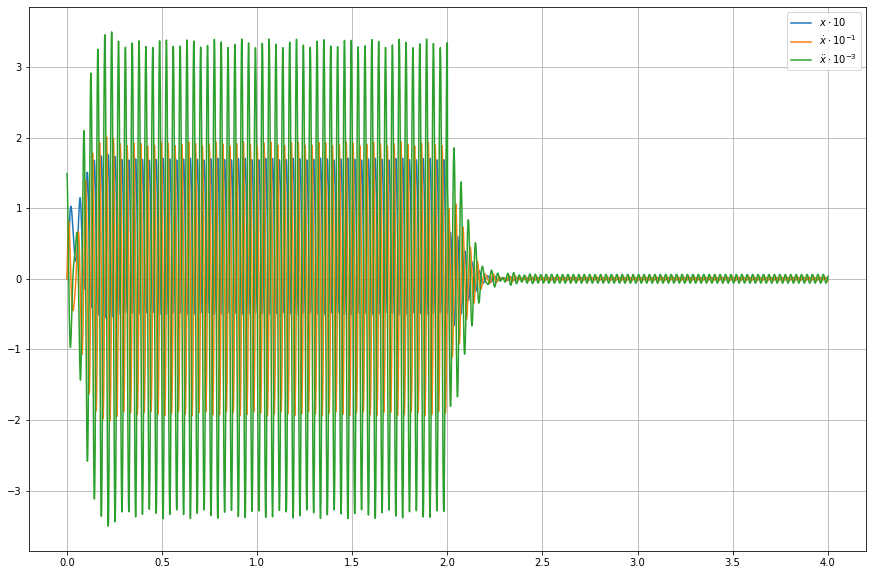

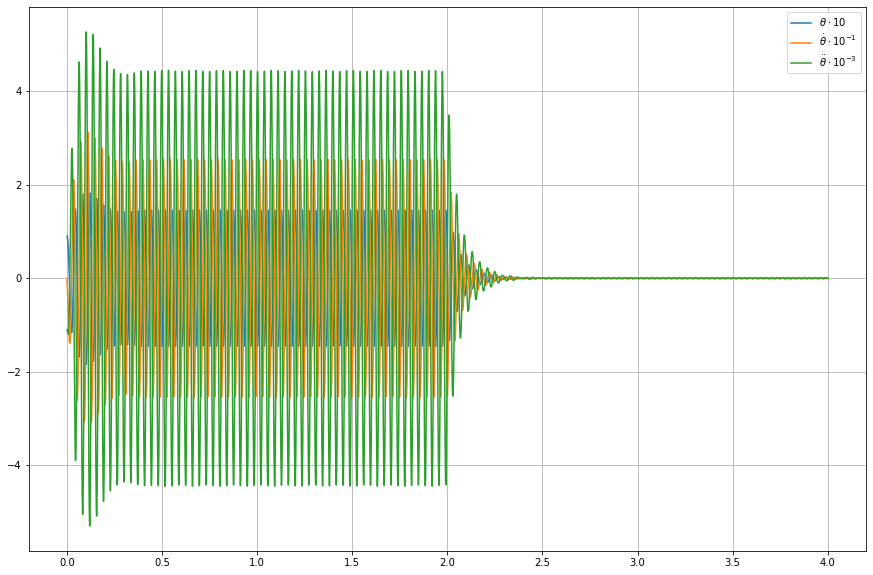

In [4]:
delta_t=0.001
x,y,funcs=rk4(func_list, tinit, y0, delta_t, 4)
# plotando todos os gráficos juntos, com um fator de escala diferente para cada um
# dos parâmetros para melhor visualização
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][0]*10 for i in range(len(y))],label='$x \cdot 10$')
plt.plot(x, [y[i][1]*10**-1 for i in range(len(y))],label='$\dot{x} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][1]*10**-3 for i in range(len(funcs))],label='$\ddot{x} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][2]*10 for i in range(len(y))],label='$θ \cdot 10$')
plt.plot(x, [y[i][3]*10**-1 for i in range(len(y))],label='$\dot{θ} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][3]*10**-3 for i in range(len(funcs))],label='$\ddot{θ} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.show()

### a) Delta T Médio $(\Delta t = 0.01)$

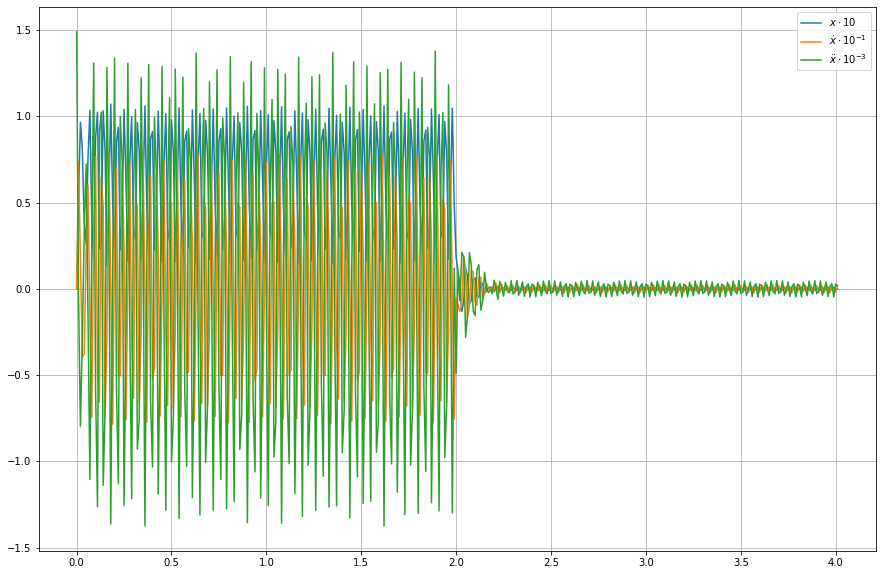

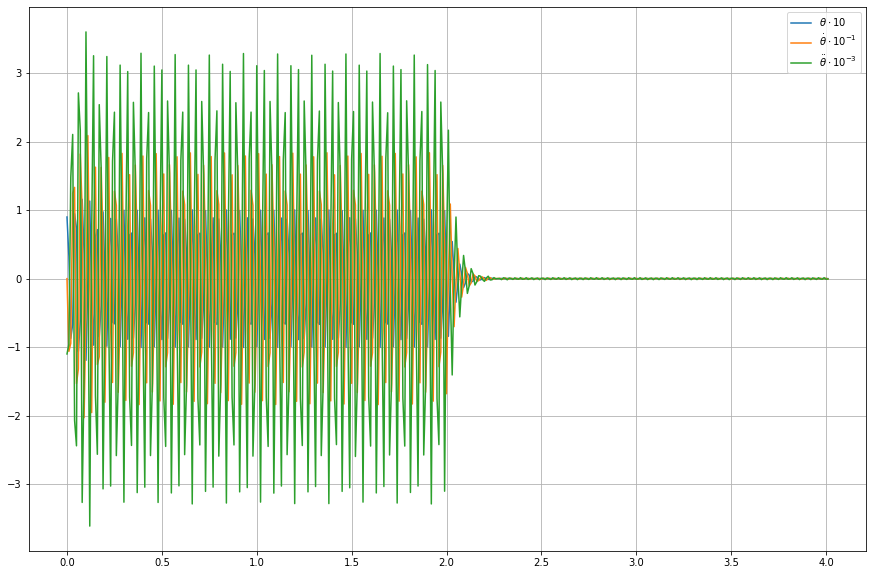

In [5]:
delta_t=0.01
x,y,funcs=rk4(func_list, tinit, y0, delta_t, 4)
# plotando todos os gráficos juntos, com um fator de escala diferente para cada um
# dos parâmetros para melhor visualização
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][0]*10 for i in range(len(y))],label='$x \cdot 10$')
plt.plot(x, [y[i][1]*10**-1 for i in range(len(y))],label='$\dot{x} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][1]*10**-3 for i in range(len(funcs))],label='$\ddot{x} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][2]*10 for i in range(len(y))],label='$θ \cdot 10$')
plt.plot(x, [y[i][3]*10**-1 for i in range(len(y))],label='$\dot{θ} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][3]*10**-3 for i in range(len(funcs))],label='$\ddot{θ} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.show()

### a) Delta T Grande $(\Delta t = 0.016)$

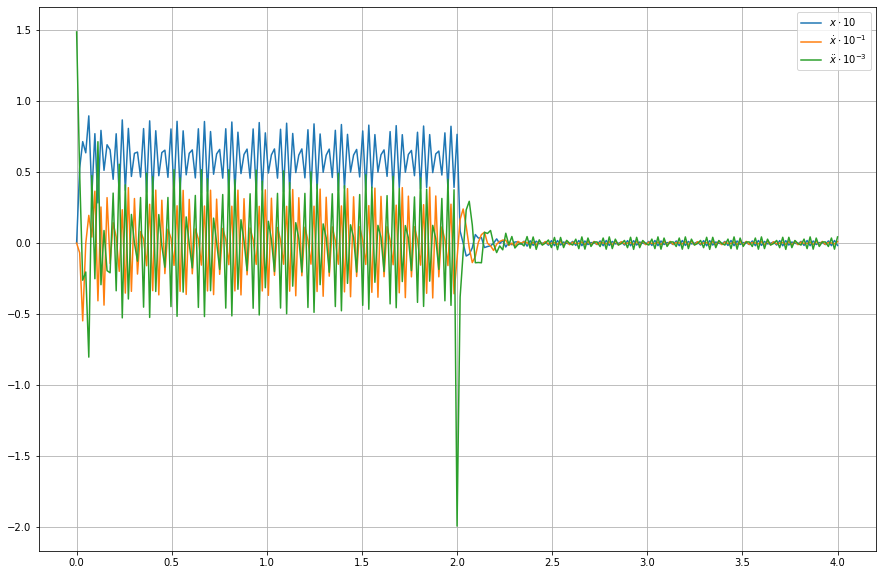

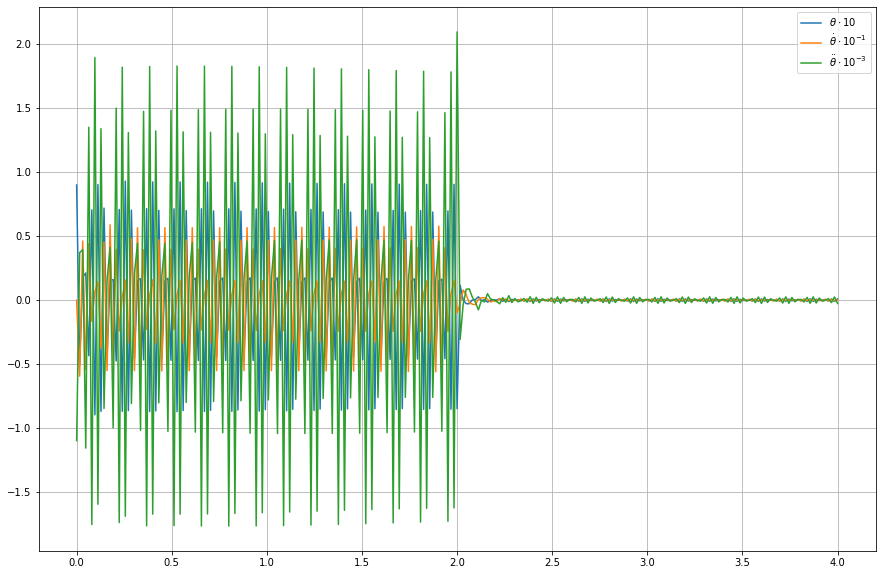

In [6]:
delta_t=0.016
x,y,funcs=rk4(func_list, tinit, y0, delta_t, 4)
# plotando todos os gráficos juntos, com um fator de escala diferente para cada um
# dos parâmetros para melhor visualização
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][0]*10 for i in range(len(y))],label='$x \cdot 10$')
plt.plot(x, [y[i][1]*10**-1 for i in range(len(y))],label='$\dot{x} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][1]*10**-3 for i in range(len(funcs))],label='$\ddot{x} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][2]*10 for i in range(len(y))],label='$θ \cdot 10$')
plt.plot(x, [y[i][3]*10**-1 for i in range(len(y))],label='$\dot{θ} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][3]*10**-3 for i in range(len(funcs))],label='$\ddot{θ} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.show()

### a) Delta T Instável $(\Delta t = 0.02)$

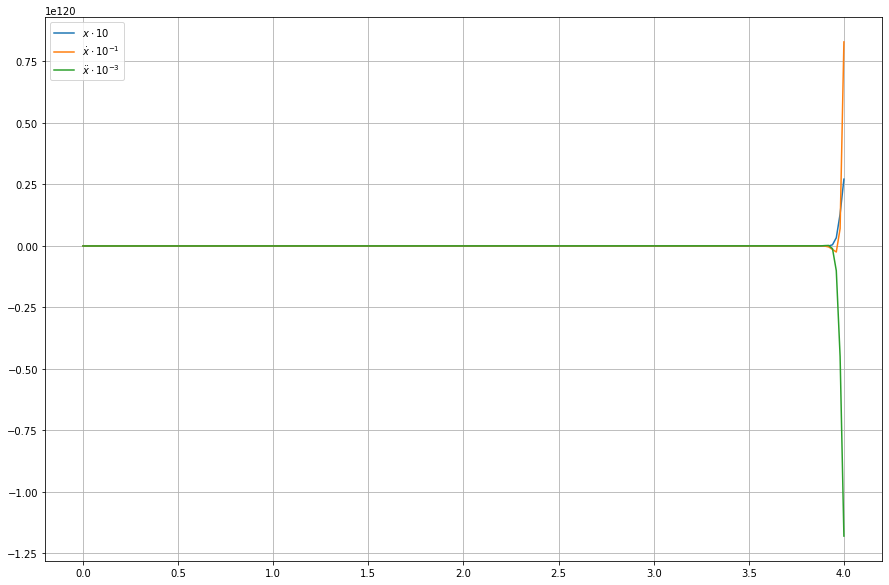

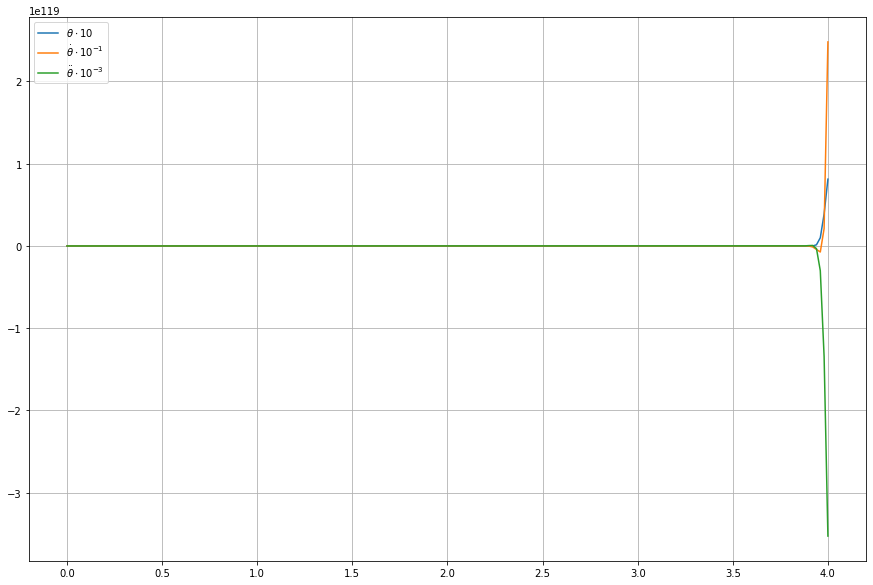

In [7]:
delta_t=0.02
x,y,funcs=rk4(func_list, tinit, y0, delta_t, 4)
# plotando todos os gráficos juntos, com um fator de escala diferente para cada um
# dos parâmetros para melhor visualização
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][0]*10 for i in range(len(y))],label='$x \cdot 10$')
plt.plot(x, [y[i][1]*10**-1 for i in range(len(y))],label='$\dot{x} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][1]*10**-3 for i in range(len(funcs))],label='$\ddot{x} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][2]*10 for i in range(len(y))],label='$θ \cdot 10$')
plt.plot(x, [y[i][3]*10**-1 for i in range(len(y))],label='$\dot{θ} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][3]*10**-3 for i in range(len(funcs))],label='$\ddot{θ} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.show()

### b) V = {30, 70} km/h

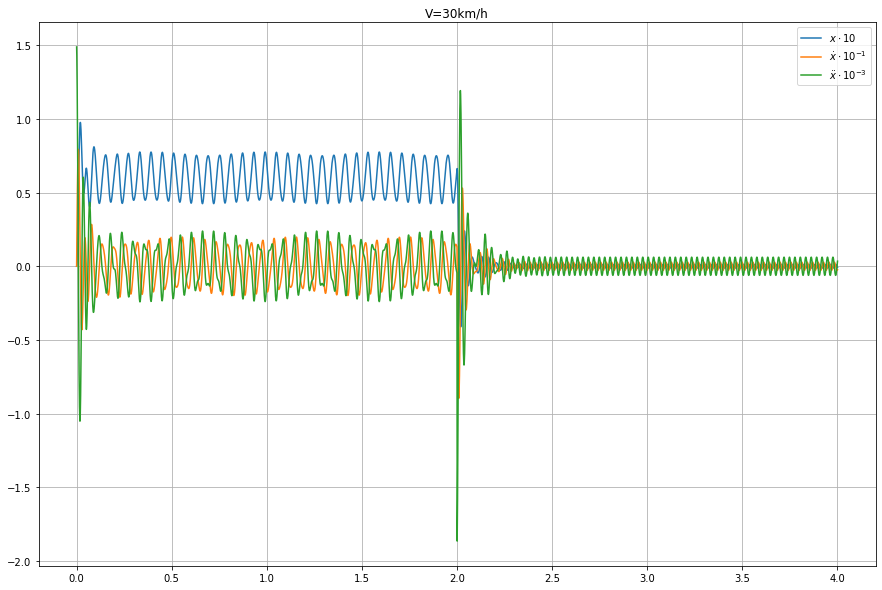

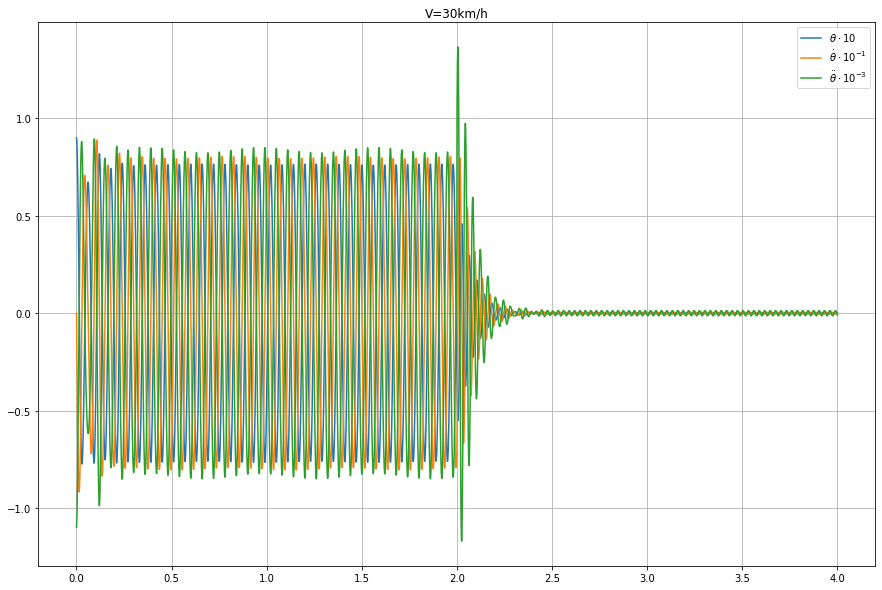

In [8]:
# Constantes
V = 30 / 3.6 # velocidade do carro em m/s
r=0.045
me=20
fe=2100 
we=fe * 2 * np.pi / 60
Fn=me*(we**2)*r
M=1783
k=2.8*10**7
c = 3*10**4
a=1.220
b=1.500
Ic=4000
e=0.75
L=0.5
A=0.060
f=0.35
x0,xdot0,theta0,thetadot0=0,0,0.09,0
omega = 2 * np.pi / (L / V)

delta_t=0.001

x,y,funcs=rk4(func_list, tinit, y0, delta_t, 4)
# plotando todos os gráficos juntos, com um fator de escala diferente para cada um
# dos parâmetros para melhor visualização
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][0]*10 for i in range(len(y))],label='$x \cdot 10$')
plt.plot(x, [y[i][1]*10**-1 for i in range(len(y))],label='$\dot{x} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][1]*10**-3 for i in range(len(funcs))],label='$\ddot{x} \cdot 10^{-3}$')
plt.grid()
plt.title('V=30km/h')
plt.legend()
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][2]*10 for i in range(len(y))],label='$θ \cdot 10$')
plt.plot(x, [y[i][3]*10**-1 for i in range(len(y))],label='$\dot{θ} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][3]*10**-3 for i in range(len(funcs))],label='$\ddot{θ} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('V=30km/h')
plt.show()

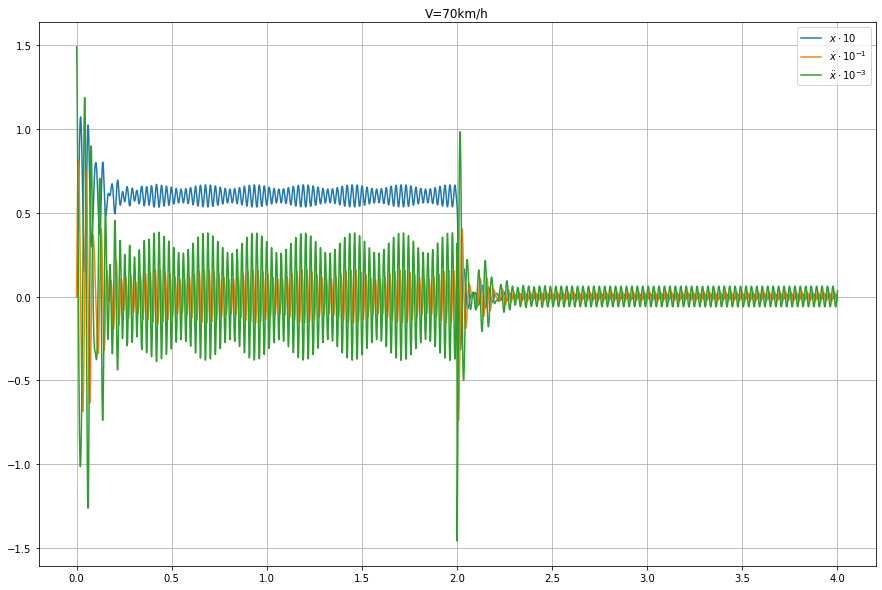

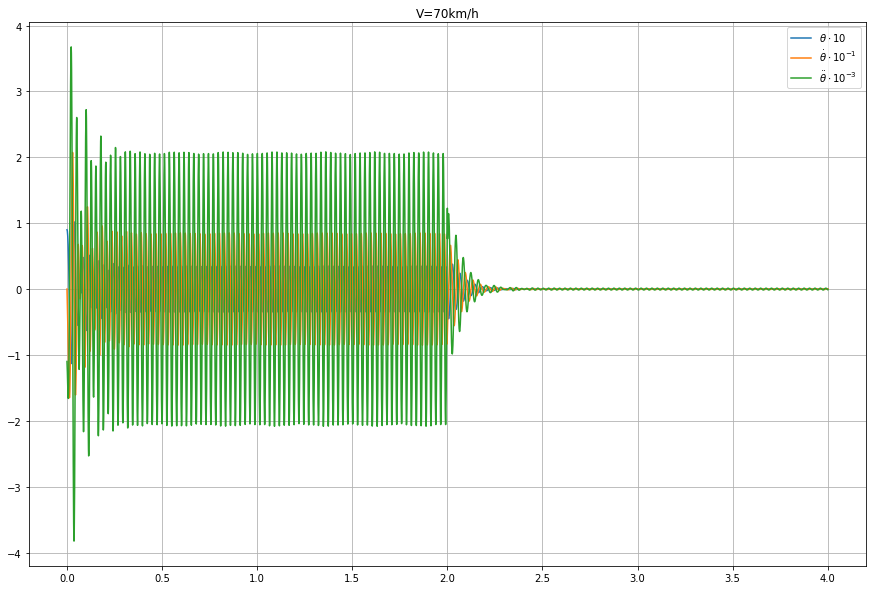

In [9]:
# Constantes
V = 70 / 3.6 # velocidade do carro em m/s
r=0.045
me=20
fe=2100 
we=fe * 2 * np.pi / 60
Fn=me*(we**2)*r
M=1783
k=2.8*10**7
c = 3*10**4
a=1.220
b=1.500
Ic=4000
e=0.75
L=0.5
A=0.060
f=0.35
x0,xdot0,theta0,thetadot0=0,0,0.09,0
omega = 2 * np.pi / (L / V)

delta_t=0.001

x,y,funcs=rk4(func_list, tinit, y0, delta_t, 4)
# plotando todos os gráficos juntos, com um fator de escala diferente para cada um
# dos parâmetros para melhor visualização
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][0]*10 for i in range(len(y))],label='$x \cdot 10$')
plt.plot(x, [y[i][1]*10**-1 for i in range(len(y))],label='$\dot{x} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][1]*10**-3 for i in range(len(funcs))],label='$\ddot{x} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('V=70km/h')
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][2]*10 for i in range(len(y))],label='$θ \cdot 10$')
plt.plot(x, [y[i][3]*10**-1 for i in range(len(y))],label='$\dot{θ} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][3]*10**-3 for i in range(len(funcs))],label='$\ddot{θ} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('V=70km/h')
plt.show()

### b) c = {1e3, 5e4, 2.5e5} kg/s

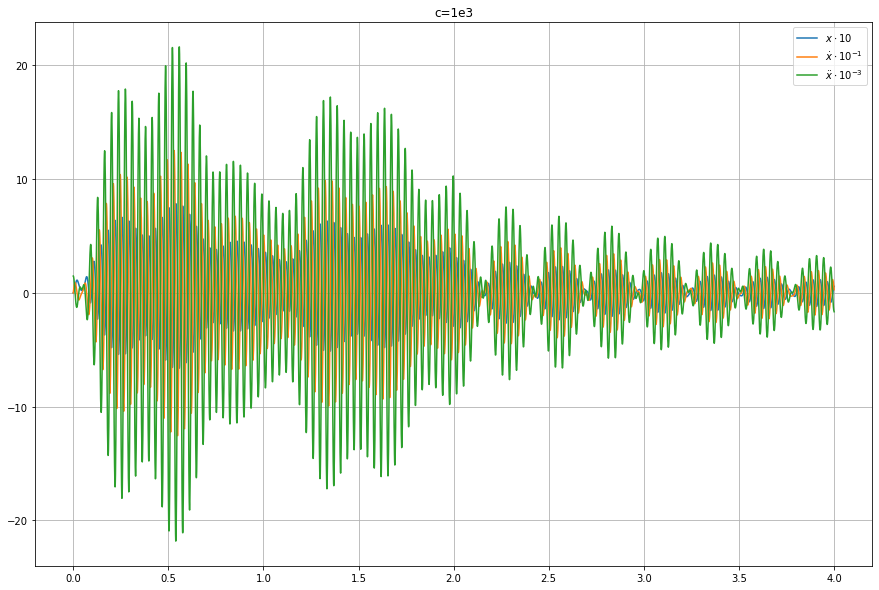

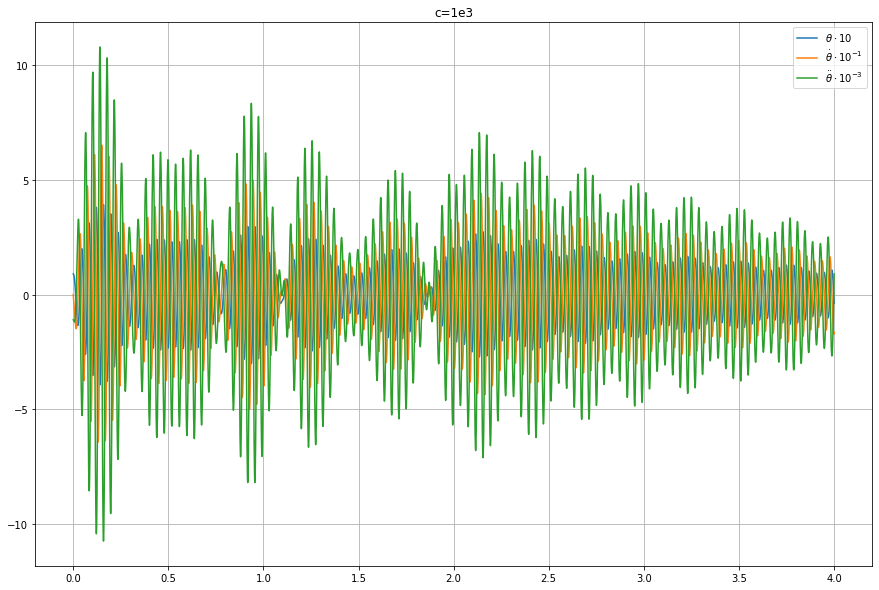

In [10]:
# Constantes
delta_t=0.001
V = 50 / 3.6 # velocidade do carro em m/s
r=0.045
me=20
fe=2100 
we=fe * 2 * np.pi / 60
Fn=me*(we**2)*r
M=1783
k=2.8*10**7
c = 1e3
a=1.220
b=1.500
Ic=4000
e=0.75
L=0.5
A=0.060
f=0.35
x0,xdot0,theta0,thetadot0=0,0,0.09,0
omega = 2 * np.pi / (L / V)

x,y,funcs=rk4(func_list, tinit, y0, delta_t, 4)
# plotando todos os gráficos juntos, com um fator de escala diferente para cada um
# dos parâmetros para melhor visualização
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][0]*10 for i in range(len(y))],label='$x \cdot 10$')
plt.plot(x, [y[i][1]*10**-1 for i in range(len(y))],label='$\dot{x} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][1]*10**-3 for i in range(len(funcs))],label='$\ddot{x} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('c=1e3')
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][2]*10 for i in range(len(y))],label='$θ \cdot 10$')
plt.plot(x, [y[i][3]*10**-1 for i in range(len(y))],label='$\dot{θ} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][3]*10**-3 for i in range(len(funcs))],label='$\ddot{θ} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('c=1e3')
plt.show()


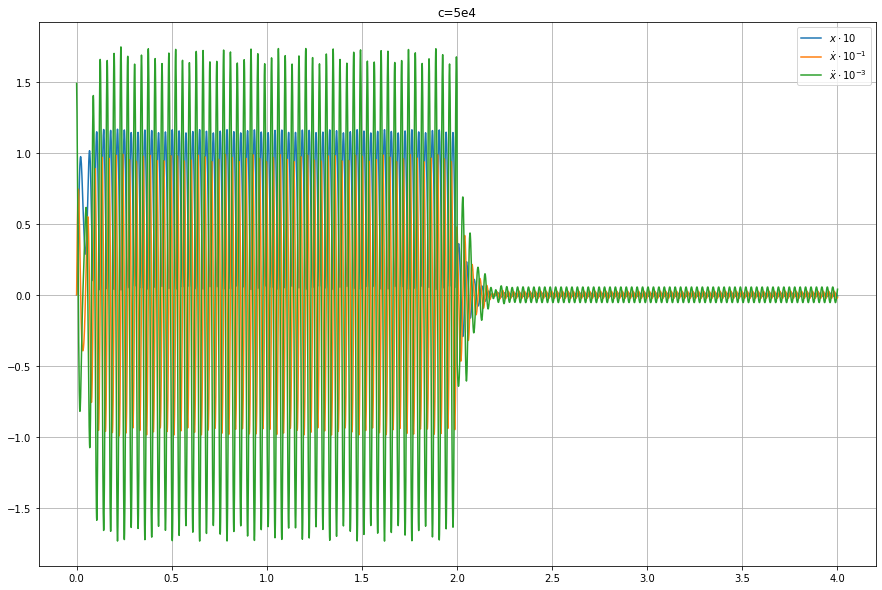

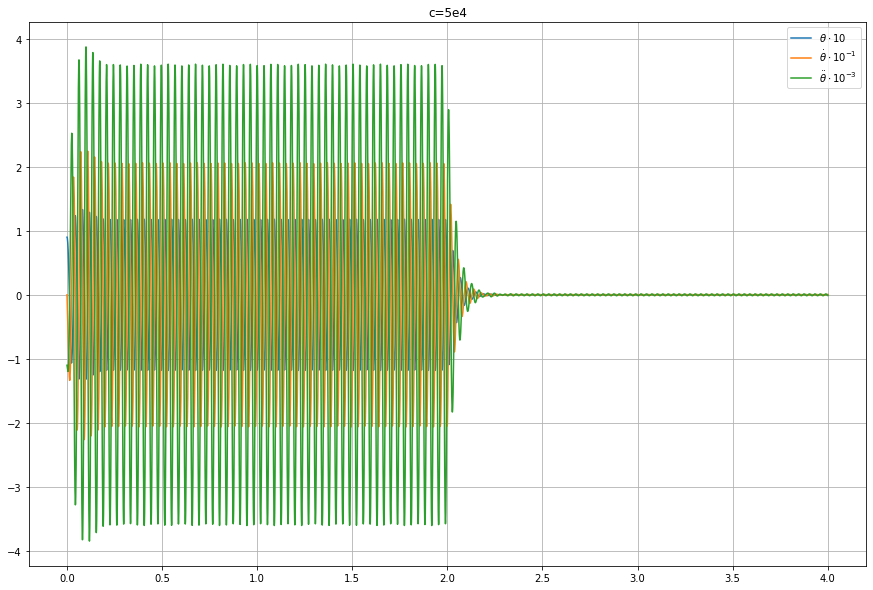

In [11]:
# Constantes
delta_t=0.001
V = 50 / 3.6 # velocidade do carro em m/s
r=0.045
me=20
fe=2100 
we=fe * 2 * np.pi / 60
Fn=me*(we**2)*r
M=1783
k=2.8*10**7
c = 5e4
a=1.220
b=1.500
Ic=4000
e=0.75
L=0.5
A=0.060
f=0.35
x0,xdot0,theta0,thetadot0=0,0,0.09,0
omega = 2 * np.pi / (L / V)

x,y,funcs=rk4(func_list, tinit, y0, delta_t, 4)
# plotando todos os gráficos juntos, com um fator de escala diferente para cada um
# dos parâmetros para melhor visualização
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][0]*10 for i in range(len(y))],label='$x \cdot 10$')
plt.plot(x, [y[i][1]*10**-1 for i in range(len(y))],label='$\dot{x} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][1]*10**-3 for i in range(len(funcs))],label='$\ddot{x} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('c=5e4')
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][2]*10 for i in range(len(y))],label='$θ \cdot 10$')
plt.plot(x, [y[i][3]*10**-1 for i in range(len(y))],label='$\dot{θ} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][3]*10**-3 for i in range(len(funcs))],label='$\ddot{θ} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('c=5e4')
plt.show()


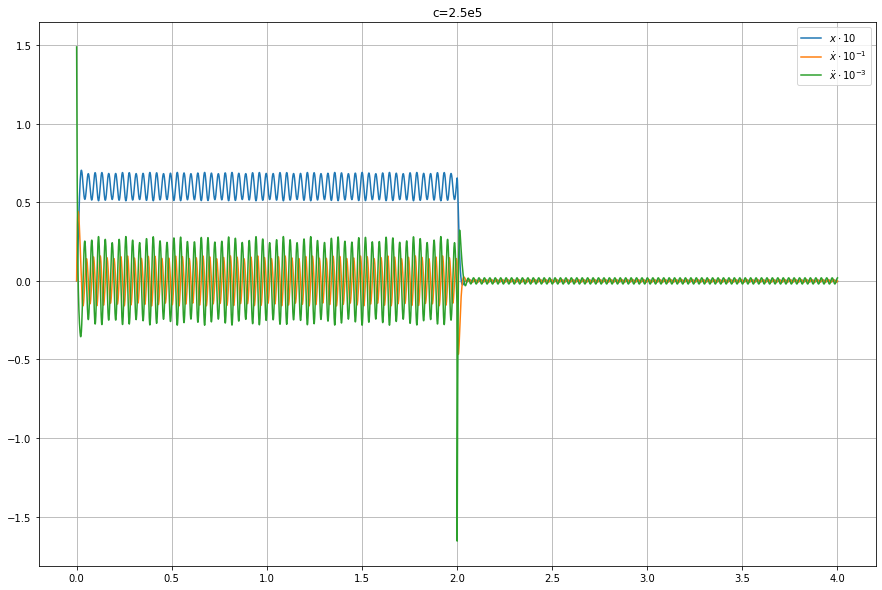

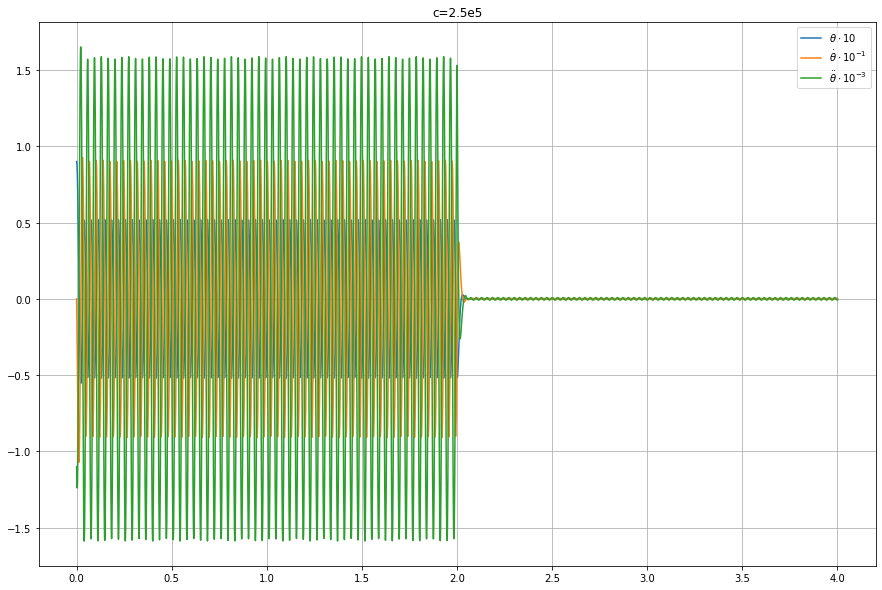

In [12]:
# Constantes
delta_t=0.001
V = 50 / 3.6 # velocidade do carro em m/s
r=0.045
me=20
fe=2100 
we=fe * 2 * np.pi / 60
Fn=me*(we**2)*r
M=1783
k=2.8*10**7
c = 2.5e5
a=1.220
b=1.500
Ic=4000
e=0.75
L=0.5
A=0.060
f=0.35
x0,xdot0,theta0,thetadot0=0,0,0.09,0
omega = 2 * np.pi / (L / V)


x,y,funcs=rk4(func_list, tinit, y0, delta_t, 4)
# plotando todos os gráficos juntos, com um fator de escala diferente para cada um
# dos parâmetros para melhor visualização
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][0]*10 for i in range(len(y))],label='$x \cdot 10$')
plt.plot(x, [y[i][1]*10**-1 for i in range(len(y))],label='$\dot{x} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][1]*10**-3 for i in range(len(funcs))],label='$\ddot{x} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('c=2.5e5')
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][2]*10 for i in range(len(y))],label='$θ \cdot 10$')
plt.plot(x, [y[i][3]*10**-1 for i in range(len(y))],label='$\dot{θ} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][3]*10**-3 for i in range(len(funcs))],label='$\ddot{θ} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('c=2.5e5')
plt.show()

### b) k = {2e4, 5e6, 7e8} kg/s

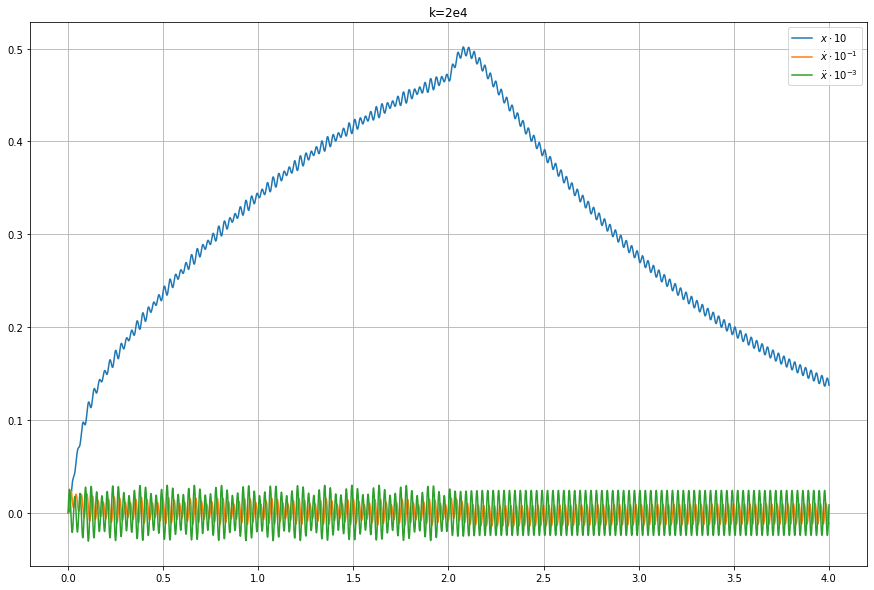

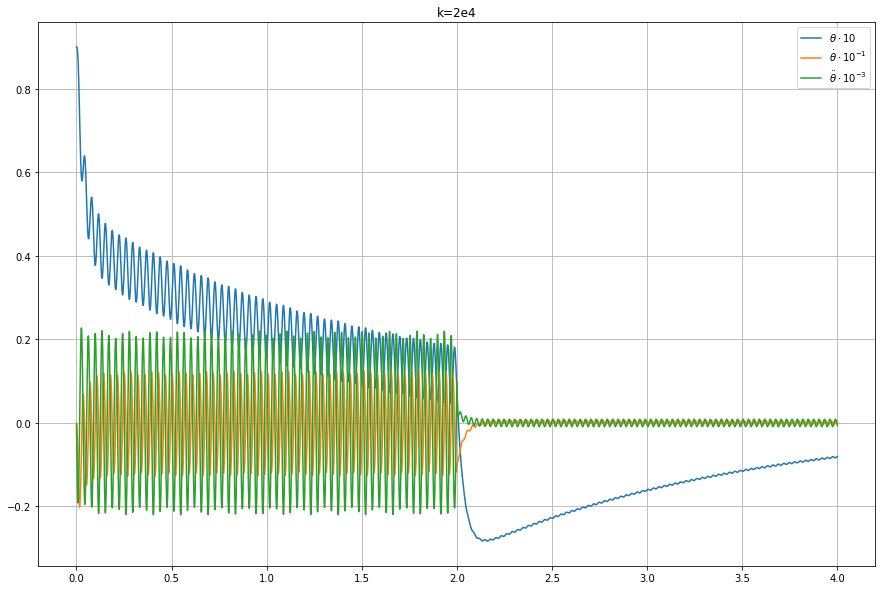

In [13]:
# Constantes
delta_t=0.001
V = 50 / 3.6 # velocidade do carro em m/s
r=0.045
me=20
fe=2100 
we=fe * 2 * np.pi / 60
Fn=me*(we**2)*r
M=1783
k=2e4
c = 3*10**4
a=1.220
b=1.500
Ic=4000
e=0.75
L=0.5
A=0.060
f=0.35
x0,xdot0,theta0,thetadot0=0,0,0.09,0
omega = 2 * np.pi / (L / V)

x,y,funcs=rk4(func_list, tinit, y0, delta_t, 4)
# plotando todos os gráficos juntos, com um fator de escala diferente para cada um
# dos parâmetros para melhor visualização
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][0]*10 for i in range(len(y))],label='$x \cdot 10$')
plt.plot(x, [y[i][1]*10**-1 for i in range(len(y))],label='$\dot{x} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][1]*10**-3 for i in range(len(funcs))],label='$\ddot{x} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('k=2e4')
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][2]*10 for i in range(len(y))],label='$θ \cdot 10$')
plt.plot(x, [y[i][3]*10**-1 for i in range(len(y))],label='$\dot{θ} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][3]*10**-3 for i in range(len(funcs))],label='$\ddot{θ} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('k=2e4')
plt.show()


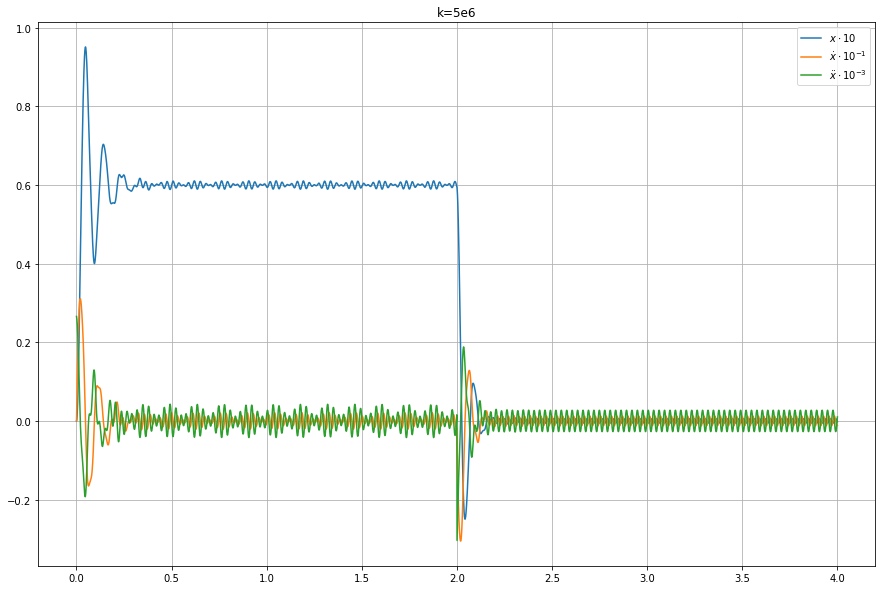

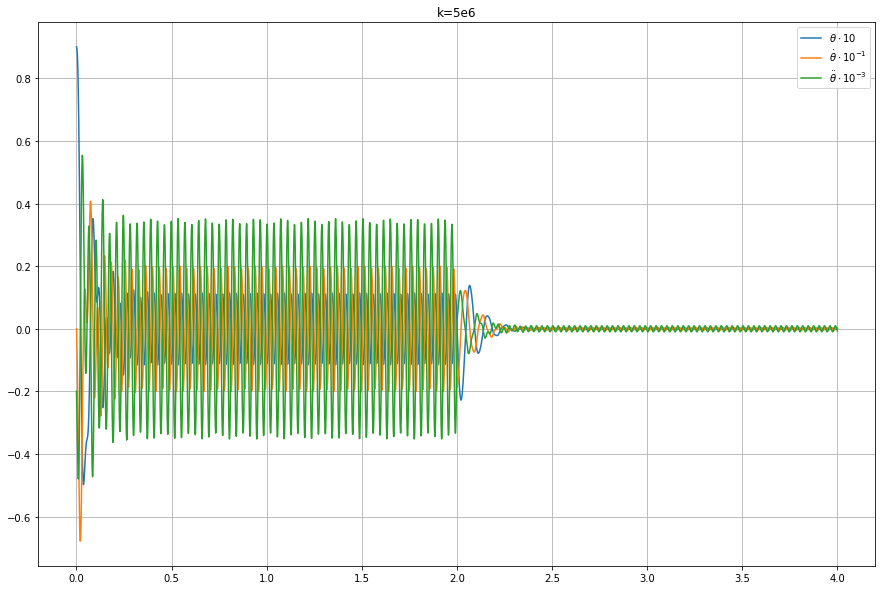

In [14]:
# Constantes
delta_t=0.001
V = 50 / 3.6 # velocidade do carro em m/s
r=0.045
me=20
fe=2100 
we=fe * 2 * np.pi / 60
Fn=me*(we**2)*r
M=1783
k=5e6
c = 3*10**4
a=1.220
b=1.500
Ic=4000
e=0.75
L=0.5
A=0.060
f=0.35
x0,xdot0,theta0,thetadot0=0,0,0.09,0
omega = 2 * np.pi / (L / V)

x,y,funcs=rk4(func_list, tinit, y0, delta_t, 4)
# plotando todos os gráficos juntos, com um fator de escala diferente para cada um
# dos parâmetros para melhor visualização
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][0]*10 for i in range(len(y))],label='$x \cdot 10$')
plt.plot(x, [y[i][1]*10**-1 for i in range(len(y))],label='$\dot{x} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][1]*10**-3 for i in range(len(funcs))],label='$\ddot{x} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('k=5e6')
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][2]*10 for i in range(len(y))],label='$θ \cdot 10$')
plt.plot(x, [y[i][3]*10**-1 for i in range(len(y))],label='$\dot{θ} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][3]*10**-3 for i in range(len(funcs))],label='$\ddot{θ} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('k=5e6')
plt.show()


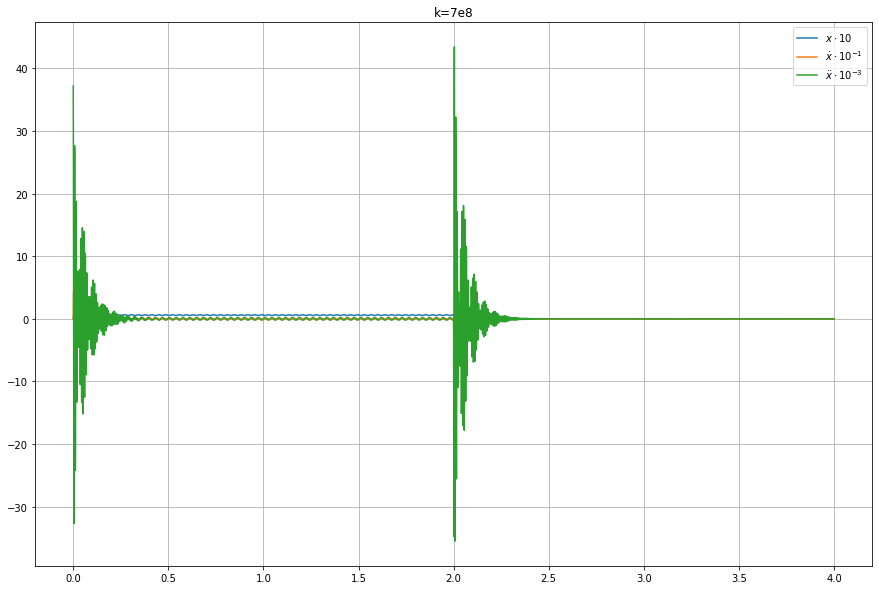

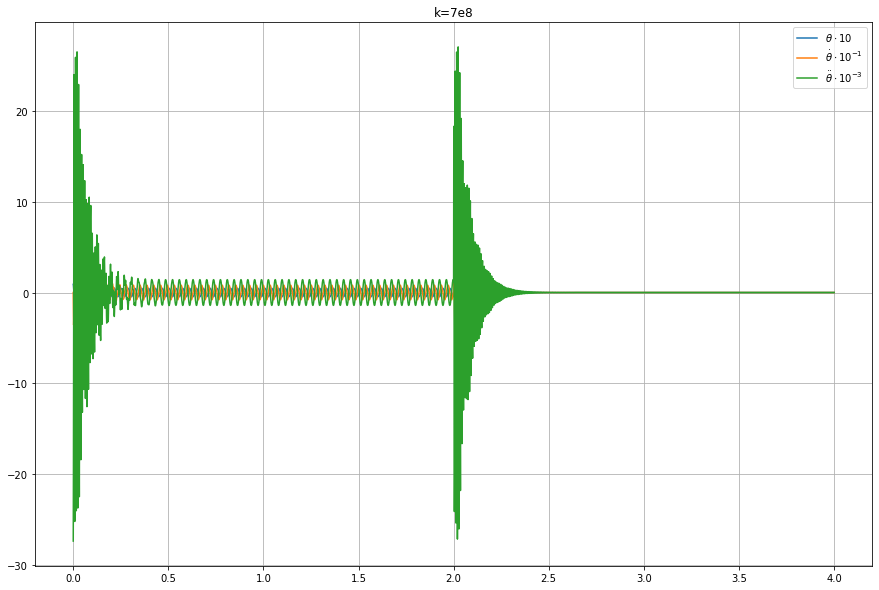

In [15]:

# Constantes
delta_t=0.001
V = 50 / 3.6 # velocidade do carro em m/s
r=0.045
me=20
fe=2100 
we=fe * 2 * np.pi / 60
Fn=me*(we**2)*r
M=1783
k=7e8
c = 3*10**4
a=1.220
b=1.500
Ic=4000
e=0.75
L=0.5
A=0.060
f=0.35
x0,xdot0,theta0,thetadot0=0,0,0.09,0
omega = 2 * np.pi / (L / V)

x,y,funcs=rk4(func_list, tinit, y0, delta_t, 4)
# plotando todos os gráficos juntos, com um fator de escala diferente para cada um
# dos parâmetros para melhor visualização
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][0]*10 for i in range(len(y))],label='$x \cdot 10$')
plt.plot(x, [y[i][1]*10**-1 for i in range(len(y))],label='$\dot{x} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][1]*10**-3 for i in range(len(funcs))],label='$\ddot{x} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('k=7e8')
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(x, [y[i][2]*10 for i in range(len(y))],label='$θ \cdot 10$')
plt.plot(x, [y[i][3]*10**-1 for i in range(len(y))],label='$\dot{θ} \cdot 10^{-1}$')
plt.plot(x, [funcs[i][3]*10**-3 for i in range(len(funcs))],label='$\ddot{θ} \cdot 10^{-3}$')
plt.grid()
plt.legend()
plt.title('k=7e8')
plt.show()

## Parte 2 - Método de Diferenças Finitas (MDF)

### Campo de Velocidades

In [16]:
# Dados
V = 100/3.6 # Velocidade do carro em m/s
h = 0.15 # Altura do carro em m
L = 3 # Comprimento do carro em m
rho = 1.225 # Densidade do ar em kg/m^3
gamma_ar = 1.4 # Constante adiabática do ar
k_ar = 0.026 # Condutividade térmica do ar em W/(m*K)
cp_ar = 1002 # Calor específico do ar em J/(kg*K)
d = 0.5*L # Dimensão do domínio
H = 2*L # Altura domínio
Tdentro = 298.15 # Temperatura dentro do carro em K
Tmotor = 353.15 # Temperatura do motor em K
Tfora = 293.15 # Temperatura fora do carro em K
lambda_s = 1.85 # fator de peso da sobrerelaxação
tol = 1e-2 # tolerância
delta_x = 0.1 # delta x = delta y -> discretização	
patm = 101325 # pressão atmosférica em Pa

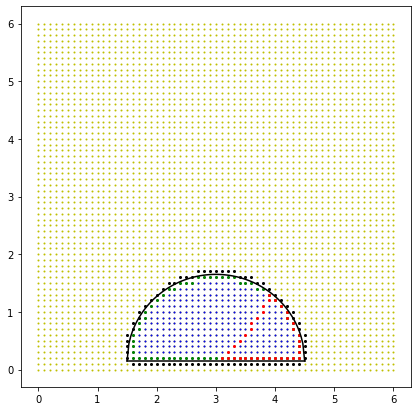

In [17]:
# Criar matriz de malha
# Cada item da matriz representa um ponto (i,j) da malha
# delta x e delta y da malha são iguais e pelo argumento h
def criar_matriz_malha(delta_x):
    matriz = []
    for i in range(int((2 * d + L) / delta_x) + 1):
        matriz.append([])
        for j in range(int(H / delta_x) + 1):
            matriz[i].append((i * delta_x, j * delta_x))
    return matriz


# Cria matriz no formato da matriz de malha
# Com todos itens iguais a 0
def criar_matriz_zeros(matriz_malha):
    matriz = []
    for i in range(len(matriz_malha)):
        matriz.append([])
        for j in range(len(matriz_malha[0])):
            matriz[i].append(0)
    return matriz

# Cria matriz no formato da matriz de malha
# Com pontos dentro do veículo valendo Tdentro
# Pontos dentro do motor valendo Tmotor
# Pontos fora do carro valendo 0
def criar_matriz_temperatura(matriz_malha):
    matriz = []
    for i in range(len(matriz_malha)):
        matriz.append([])
        for j in range(len(matriz_malha[0])):
            if dentro_motor(j,i):
                matriz[i].append(Tdentro)
            elif dentro_veiculo(j,i):
                matriz[i].append(Tmotor)
            else:
                matriz[i].append(0)
    return matriz


# Função que descreve o formato do veículo
def veiculo(x):
    #abs adicionado para que o dominio fique bem definido
    return np.sqrt(abs((L / 2) ** 2 - (x - d - L / 2) ** 2)) + h

# Função que descreve a reta que separa motor do veiculo
def motor(x):
    return np.tan(x-d-L/2)+h


# Função inversa do veículo
# resolve numericamente
def veiculo_inversa(i,j,y):
    if y < h or y > h+L/2:
        raise Exception("y não está no veículo")
    if j*delta_x < d+L/2:
        return fsolve(lambda x: veiculo(x) - y,x0=d+L/4)[0]
    elif j*delta_x > d+L/2: 
        return fsolve(lambda x: veiculo(x) - y,x0=d+3*L/4)[0]
    else:
        return fsolve(lambda x: veiculo(x) - y,x0=3,)[0]


# Checa se ponto está dentro do veiculo
def dentro_veiculo(i, j):
    x, y = i*delta_x, j*delta_x
    if x >= d and x <= d + L:
        if y >= h and y <= veiculo(x):
            return True
    return False

def dentro_motor(i,j):
    x, y = i*delta_x, j*delta_x
    if x >= d + L/2 and x <= d + L:
        if y >= h and y <= motor(x):
            if dentro_veiculo(i,j):
                return True
    return False


# Função que encontra os pontos da malha que estão fora e mais próximos do veículo
def encontrar_pontos_fora(matriz_malha):
    pontos_fora = []
    for j in range(len(matriz_malha[0])):
        for i in range(len(matriz_malha)):
            if not dentro_veiculo(i, j):
                if dentro_veiculo(i - 1, j) or dentro_veiculo(i + 1, j) or dentro_veiculo(i, j - 1) or dentro_veiculo(i, j + 1):    
                    if (i, j) not in pontos_fora:
                        pontos_fora.append((i, j))
    return pontos_fora


# Função que encontra os pontos da malha que estão no interior do veículo
def encontrar_pontos_interior(matriz_malha):
    pontos_interior = []
    for j in range(len(matriz_malha[0])):
        for i in range(len(matriz_malha)):
            if dentro_veiculo(i, j):
                pontos_interior.append((i, j))
    return pontos_interior


# Função que encontra os pontos da malha que estão dentro e mais próximos do veículo
def encontrar_pontos_im_dentro(matriz_malha):
    pontos_im_dentro = []
    for j in range(len(matriz_malha[0])):
        for i in range(len(matriz_malha)):
            if dentro_veiculo(i, j):
                if (
                    not dentro_veiculo(i - 1, j)
                    or not dentro_veiculo(i + 1, j)
                    or not dentro_veiculo(i, j - 1)
                    or not dentro_veiculo(i, j + 1)
                ):
                    pontos_im_dentro.append((i, j))
    return pontos_im_dentro

# funcao que encontra os pontos da malha que estao imediatamente ao redor do motor
def encontrar_pontos_dentro_motor(matriz_malha):
    pontos_ao_redor = []
    for j in range(len(matriz_malha[0])):
        for i in range(len(matriz_malha)):
            if dentro_motor(i,j):
                if not dentro_motor(i-1,j) or not dentro_motor(i+1,j) or not dentro_motor(i,j-1) or not dentro_motor(i,j+1):
                    pontos_ao_redor.append((i,j))
    return pontos_ao_redor

# Plota a Malha
def plotar_matriz(matriz_malha, pontos_interior, pontos_im_dentro, pontos_ao_redor, pontos_dentro_motor):
    plt.figure(figsize=(7, 7))
    for i in range(len(matriz_malha)):
        for j in range(len(matriz_malha[0])):
            plt.plot(i * delta_x, j * delta_x, "yo", markersize=1)
    for ponto in pontos_interior:
        plt.plot(ponto[0] * delta_x, ponto[1] * delta_x, "bo", markersize=1)
    for ponto in pontos_im_dentro:
        plt.plot(ponto[0] * delta_x, ponto[1] * delta_x, "go", markersize=2)
    for ponto in pontos_ao_redor:
        plt.plot(ponto[0] * delta_x, ponto[1] * delta_x, "ko", markersize=2)
    for ponto in pontos_dentro_motor:
        plt.plot(ponto[0] * delta_x, ponto[1] * delta_x, "ro", markersize=2)
    # plota o veículo
    x = np.linspace(d, d + L, 100)
    plt.plot(x, veiculo(x), "k")
    plt.plot(x, [h for _ in x], "k")
    plt.show()

malha=criar_matriz_malha(delta_x)
pontos_ao_redor=encontrar_pontos_fora(malha)
pontos_interior=encontrar_pontos_interior(malha)
pontos_im_dentro=encontrar_pontos_im_dentro(malha)
pontos_dentro_motor = encontrar_pontos_dentro_motor(malha)

plotar_matriz(
    matriz_malha=malha,
    pontos_interior=pontos_interior,
    pontos_im_dentro=pontos_im_dentro,
    pontos_ao_redor=pontos_ao_redor,
    pontos_dentro_motor=pontos_dentro_motor
)


#### Equações:

$$\frac{\partial^2{\psi}}{\partial x^2} + \frac{\partial^2{\psi}}{\partial y^2} = 0$$



    Para posições fora das bordas:

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 \psi}{\partial x^2}\right|_{i, j}=\frac{\psi_{i+1, j}-2 \psi_{i, j}+\psi_{i-1, j}}{\Delta x^2}\\
\left.\frac{\partial^2 \psi}{\partial y^2}\right|_{i, j}=\frac{\psi_{i, j+1}-2 \psi_{i, j}+\psi_{i, j-1}}{\Delta y^2}
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

$$\psi_{i, j}=\frac{\psi_{i+1, j}+\psi_{i-1, j} + \psi_{i, j+1}+\psi_{i, j-1}}{4}$$

---

`Para borda esquerda` $\left(\frac{\partial \psi}{\partial x}=0\right)$

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 \psi}{\partial x^2}\right|_{i, j}=\frac{2}{\Delta x^2} \left(\psi_{i+1,j}-\psi_{i,j}\right)\\
\left.\frac{\partial^2 \psi}{\partial y^2}\right|_{i, j}=\frac{\psi_{i, j+1}-2 \psi_{i, j}+\psi_{i, j-1}}{\Delta y^2}
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

$$\psi_{i,j}=\frac{2 \psi_{i+1,j}   + \psi_{i, j+1}+\psi_{i, j-1}} {4}$$

---

`Para borda superior` $\left(\frac{\partial \psi}{\partial y}=V\right)$

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 \psi}{\partial x^2}\right|_{i, j}=\frac{\psi_{i+1, j}-2 \psi_{i, j}+\psi_{i-1, j}}{\Delta x^2}\\
\left.\frac{\partial^2 \psi}{\partial y^2}\right|_{i, j}=\frac{2}{\Delta y^2} \left(\psi_{i,j-1}-\psi_{i,j}+\Delta y \cdot V\right)
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

$$\psi_{i, j}=\frac{\psi_{i+1, j}+\psi_{i-1, j} + 2 \psi_{i,j-1}+ 2 \Delta y \cdot V}{4}$$

---

`Borda direita` $\left(\frac{\partial \psi}{\partial x}=0\right)$

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 \psi}{\partial x^2}\right|_{i, j}=\frac{2}{\Delta x^2} \left(\psi_{i-1,j}-\psi_{i,j}\right)\\
\left.\frac{\partial^2 \psi}{\partial y^2}\right|_{i, j}=\frac{\psi_{i, j+1}-2 \psi_{i, j}+\psi_{i, j-1}}{\Delta y^2}
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

$$\psi_{i, j}=\frac{2 \psi_{i-1,j} + \psi_{i, j+1} +\psi_{i, j-1}}{4}$$

---

    Para borda inferior

$$\psi=0$$

---

`Canto Superior Esquerdo` $\left(\frac{\partial \psi}{\partial x}=0\right)$ e $\left(\frac{\partial \psi}{\partial y}=V\right)$

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 \psi}{\partial x^2}\right|_{i, j}=\frac{2}{\Delta x^2} \left(\psi_{i+1,j}-\psi_{i,j}\right)\\
\left.\frac{\partial^2 \psi}{\partial y^2}\right|_{i, j}=\frac{2}{\Delta y^2} \left(\psi_{i,j-1}-\psi_{i,j}+\Delta y \cdot V\right)
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

$$\psi_{i,j}= \frac{ \psi_{i+1,j} +  \psi_{i,j-1}+  \Delta y \cdot V}{2}$$

---


`Canto Superior Direito` $\left(\frac{\partial \psi}{\partial y}=V\right)$ e $\left(\frac{\partial \psi}{\partial x}=0\right)$

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 \psi}{\partial x^2}\right|_{i, j}=\frac{2}{\Delta x^2} \left(\psi_{i-1,j}-\psi_{i,j}\right)\\
\left.\frac{\partial^2 \psi}{\partial y^2}\right|_{i, j}=\frac{2}{\Delta y^2} \left(\psi_{i,j-1}-\psi_{i,j}+\Delta y \cdot V\right)
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

$$\psi_{i,j}= \frac{ \psi_{i-1,j} +  \psi_{i,j-1}+  \Delta y \cdot V}{2}$$


---

    Canto Inferior Direito e Canto Inferior Esquerdo 

$$\psi=0$$

##### Para os pontos ao redor do carro

    Imediatamente acima e a esquerda do semi-circulo:

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 \psi}{\partial x^2}\right|_{i, j}=\frac{2}{a \Delta x^2 (a+1)} \left(a\psi_{i-1,j}-\psi_{i,j} (1+a) \right)\\
\left.\frac{\partial^2 \psi}{\partial y^2}\right|_{i, j}=\frac{2}{b \Delta y^2 (b+1)}\left( b \psi_{i, j+1}- \psi_{i, j} (1+b) \right)
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

<!-- $$\frac{2}{a  (a+1)} \left(a\psi_{i-1,j}-\psi_{i,j} (1+a) \right) + \frac{2}{b  (b+1)}\left( b \psi_{i, j+1}- \psi_{i, j} (1+b) \right)$$
$$\frac{2 \psi_{i-1,j}}{(a+1)} + \frac{-2 \psi_{i,j}}{a} + \frac{2 \psi_{i, j+1}}{(b+1)} + \frac{-2\psi_{i, j}}{b}$$
$$\frac{2 \psi_{i-1,j}}{(a+1)} + \frac{2 \psi_{i, j+1}}{(b+1)} - \psi_{i, j} (\frac{2}{b} +\frac{2}{a})$$
$$\psi_{i, j} (\frac{2}{b} +\frac{2}{a})=\frac{2 \psi_{i-1,j}}{(a+1)} + \frac{2 \psi_{i, j+1}}{(b+1)}$$
$$\psi_{i, j} (\frac{2a+2b}{ab})=\frac{2 \psi_{i-1,j}}{(a+1)} + \frac{2 \psi_{i, j+1}}{(b+1)}$$ -->
$$\psi_{i, j} =\left( \frac{\psi_{i-1,j}}{(a+1)} + \frac{\psi_{i, j+1}}{(b+1)} \right) \left( \frac{ab}{a+b}\right)$$


---



    Imediatamente acima e a direita do semi-circulo:

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 \psi}{\partial x^2}\right|_{i, j}=\frac{2}{a \Delta x^2 (a+1)} \left(a\psi_{i+1,j}-\psi_{i,j} (1+a) \right)\\
\left.\frac{\partial^2 \psi}{\partial y^2}\right|_{i, j}=\frac{2}{b \Delta y^2 (b+1)}\left( b \psi_{i, j+1}- \psi_{i, j} (1+b) \right)
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

$$\psi_{i, j} =\left( \frac{\psi_{i+1,j}}{(a+1)} + \frac{\psi_{i, j+1}}{(b+1)} \right) \left( \frac{ab}{a+b}\right)$$



---


    Imediatamente a direita do semi-circulo:

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 \psi}{\partial x^2}\right|_{i, j}=\frac{2}{a \Delta x^2 (a+1)} \left(a\psi_{i+1,j}-\psi_{i,j} (1+a) \right)\\
\left.\frac{\partial^2 \psi}{\partial y^2}\right|_{i, j}=\frac{\psi_{i, j+1}-2 \psi_{i, j}+\psi_{i, j-1}}{\Delta y^2}
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

<!-- $$\frac{2}{a (a+1)}  \left(a\psi_{i+1,j}-\psi_{i,j} (1+a) \right)+\psi_{i, j+1}-2 \psi_{i, j}+\psi_{i, j-1}=0$$
$$\frac{2\psi_{i+1,j}}{ (a+1)} +\frac{-2\psi_{i,j} (1+a)}{a (a+1)} +\psi_{i, j+1}-2 \psi_{i, j}+\psi_{i, j-1}=0$$
$$2  \psi_{i, j} (1+\frac{(1+a)}{a (a+1)} )=\psi_{i, j+1}+\psi_{i, j-1} +\frac{2\psi_{i+1,j}}{ (a+1)}$$
$$\psi_{i, j} (\frac{2a^2+4a+2}{a (a+1)} )=\left( \psi_{i, j+1}+\psi_{i, j-1} +\frac{2\psi_{i+1,j}}{ (a+1)}\right) $$ -->
$$\psi_{i, j} =\left( \psi_{i, j+1}+\psi_{i, j-1} +\frac{2\psi_{i+1,j}}{ (a+1)}\right) \frac{a (a+1)}{2a^2+4a+2}$$


---


    Imediatamente a esquerda do semi-circulo:


$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 \psi}{\partial x^2}\right|_{i, j}=\frac{2}{a \Delta x^2 (a+1)} \left(a\psi_{i-1,j}-\psi_{i,j} (1+a) \right)\\
\left.\frac{\partial^2 \psi}{\partial y^2}\right|_{i, j}=\frac{\psi_{i, j+1}-2 \psi_{i, j}+\psi_{i, j-1}}{\Delta y^2}
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

$$\psi_{i, j} =\left( \psi_{i, j+1}+\psi_{i, j-1} +\frac{2\psi_{i-1,j}}{ (a+1)}\right) \frac{a (a+1)}{2a^2+4a+2}$$


---


    Imediatamente acima do semi-circulo:

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 \psi}{\partial x^2}\right|_{i, j}=\frac{\psi_{i+1, j}-2 \psi_{i, j}+\psi_{i-1, j}}{\Delta x^2}\\
\left.\frac{\partial^2 \psi}{\partial y^2}\right|_{i, j}=\frac{2}{a \Delta y^2 (a+1)}\left( a \psi_{i, j+1}- \psi_{i, j} (1+a) \right)
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

$$\psi_{i, j}=\left(\psi_{i+1, j}+\psi_{i-1, j} + \frac{2 \psi_{i, j+1}}{a+1}\right) \left(\frac{a(a+1)}{2a^2+4a+2} \right)$$


---


    Imediatamente abaixo do semi-círculo:

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 \psi}{\partial x^2}\right|_{i, j}=\frac{\psi_{i+1, j}-2 \psi_{i, j}+\psi_{i-1, j}}{\Delta x^2}\\
\left.\frac{\partial^2 \psi}{\partial y^2}\right|_{i, j}=\frac{2}{a \Delta y^2 (a+1)} (a \psi_{i, j-1}- \psi_{i, j} (1+a))
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

<!-- $$\frac{\psi_{i+1, j}-2 \psi_{i, j}+\psi_{i-1, j}}{x^2} + \frac{2}{a x^2 (a+1)} (a \psi_{i, j-1}- \psi_{i, j} (1+a))=0$$
$$\psi_{i+1, j}-2 \psi_{i, j}+\psi_{i-1, j} + \frac{2 \psi_{i, j-1}}{a+1} + \frac{ - 2 \psi_{i, j} (1+a)}{a(a+1)} =0$$
$$\psi_{i+1, j}+\psi_{i-1, j} + \frac{2 \psi_{i, j-1}}{a+1} + \frac{ - 2 \psi_{i, j} (1+a)}{a(a+1)} -2 \psi_{i, j} =0$$
$$\psi_{i+1, j}+\psi_{i-1, j} + \frac{2 \psi_{i, j-1}}{a+1} -2 \psi_{i, j} ( \frac{(1+a)}{a(a+1)} +1) =0$$
$$2 \psi_{i, j} ( \frac{(1+a)}{a(a+1)} +1)=\psi_{i+1, j}+\psi_{i-1, j} + \frac{2 \psi_{i, j-1}}{a+1}$$
$$2 \psi_{i, j} ( \frac{(1+a)+a(a+1)}{a(a+1)})=\psi_{i+1, j}+\psi_{i-1, j} + \frac{2 \psi_{i, j-1}}{a+1}$$
$$\psi_{i, j} ( \frac{2a^2+4a+2}{a(a+1)})=\psi_{i+1, j}+\psi_{i-1, j} + \frac{2 \psi_{i, j-1}}{a+1}$$ -->
$$\psi_{i, j}=\left(\psi_{i+1, j}+\psi_{i-1, j} + \frac{2 \psi_{i, j-1}}{a+1}\right) \left(\frac{a(a+1)}{2a^2+4a+2} \right)$$



In [18]:

# Definindo funções que calculam psi
# psi_geral -> calcula psi para pontos que não estão nas bordas
# psi_esquerda -> calcula psi para pontos que estão na borda esquerda
# psi_superior -> calcula psi para pontos que estão na borda superior
# psi_direita -> calcula psi para pontos que estão na borda direita
# psi_inferior -> calcula psi para pontos que estão na borda inferior
# psi_canto_superior_esquerdo -> calcula psi para pontos que estão no canto superior esquerdo
# psi_canto_superior_direito -> calcula psi para pontos que estão no canto superior direito
# psi_inferior -> calcula psi para pontos que estão na borda inferior
# psi_dentro -> calcula psi para pontos que estão dentro do veículo
# obs: os indices da matriz começam devem ser invertidos em relação aos indices da malha

def psi_geral(matriz, i, j):
    return 1/4 * (matriz[j][i+1] + matriz[j][i-1] + matriz[j+1][i] + matriz[j-1][i])

def psi_esquerda(matriz, i, j):
    return 1/4 * (2*matriz[j][i+1] + matriz[j+1][i] + matriz[j-1][i])

def psi_superior(matriz, i, j):
    return 1/4 * (matriz[j][i+1] + matriz[j][i-1] + 2*matriz[j-1][i] + 2 * delta_x * V)

def psi_direita(matriz, i, j):
    return 1/4 * (2*matriz[j][i-1] + matriz[j+1][i] + matriz[j-1][i])

def psi_canto_esquerdo(matriz, i, j):
    return 1/2 * (matriz[j][i+1] + matriz[j-1][i] + delta_x * V)

def psi_canto_direito(matriz, i, j):
    return 1/2 * (matriz[j][i-1] + matriz[j-1][i] + delta_x * V)

def psi_inferior(matriz, i, j):
    return 0

def psi_fronteira_veiculo(matriz, i, j):
    if (i,j-1) in pontos_im_dentro and (i+1,j) in pontos_im_dentro:
        # distancia ponto até circulo
        a = abs(i*delta_x - veiculo_inversa(i,j,j*delta_x))/delta_x
        b = abs(j*delta_x - veiculo(i*delta_x))/delta_x
        # acima e a esquerda
        # $$\psi_{i, j} =\left( \frac{\psi_{i-1,j}}{(a+1)} + \frac{\psi_{i, j+1}}{(b+1)} \right) \left( \frac{ab}{a+b}\right)$$
        return ((matriz[j][i-1] / (a + 1)) + (matriz[j][i+1] / (b + 1))) * ((a * b) / (a + b))
    elif (i,j-1) in pontos_im_dentro and (i-1,j) in pontos_im_dentro:
        # distancia ponto até circulo
        a = abs(i*delta_x - veiculo_inversa(i,j,j*delta_x))/delta_x
        b = abs(j*delta_x - veiculo(i*delta_x))/delta_x
        # acima e a direita
        # $$\psi_{i, j} =\left( \frac{\psi_{i+1,j}}{(a+1)} + \frac{\psi_{i, j+1}}{(b+1)} \right) \left( \frac{ab}{a+b}\right)$$
        return ((matriz[j][i+1] / (a + 1)) + (matriz[j+1][i] / (b + 1))) * ((a * b) / (a + b))
    elif (i-1,j) in pontos_im_dentro:
        # distancia ponto até circulo
        a = abs(i*delta_x - veiculo_inversa(i,j,j*delta_x))/delta_x
        # a direita
        # $$\psi_{i, j} =\left( \psi_{i, j+1}+\psi_{i, j-1} +\frac{2\psi_{i+1,j}}{ (a+1)}\right) \frac{a (a+1)}{2a^2+4a+2}$$
        return ((matriz[j+1][i] + matriz[j-1][i] + (2 * matriz[j][i+1]) / (a + 1)) * a * (a + 1)) / (2 * a**2 + 4 * a + 2)
    elif (i+1,j) in pontos_im_dentro:
        # distancia ponto até circulo
        a = abs(i*delta_x - veiculo_inversa(i,j,j*delta_x))/delta_x
        # a esquerda
        # $$\psi_{i, j} =\left( \psi_{i, j+1}+\psi_{i, j-1} +\frac{2\psi_{i-1,j}}{ (a+1)}\right) \frac{a (a+1)}{2a^2+4a+2}$$
        return ((matriz[j+1][i] + matriz[j-1][i] + (2 * matriz[j][i-1]) / (a + 1)) * a * (a + 1)) / (2 * a**2 + 4 * a + 2)
    elif (i,j-1) in pontos_im_dentro:
        # acima
        a = abs(j*delta_x - veiculo(i*delta_x))/delta_x
        # $$\psi_{i, j}=\left(\psi_{i+1, j}+\psi_{i-1, j} + \frac{2 \psi_{i, j+1}}{a+1}\right) \left(\frac{a(a+1)}{2a^2+4a+2} \right)$$
        return ((matriz[j][i+1] + matriz[j][i-1] + (2 * matriz[j+1][i]) / (a + 1)) * a * (a + 1)) / (2 * a**2 + 4 * a + 2)
    elif (i,j+1) in pontos_im_dentro:
        # abaixo
        a = abs(j*delta_x - veiculo(i*delta_x))/delta_x
        # $$\psi_{i, j}=\left(\psi_{i+1, j}+\psi_{i-1, j} + \frac{2 \psi_{i, j-1}}{a+1}\right) \left(\frac{a(a+1)}{2a^2+4a+2} \right)$$
        return ((matriz[j][i+1] + matriz[j][i-1] + (2 * matriz[j-1][i]) / (a + 1)) * a * (a + 1)) / (2 * a**2 + 4 * a + 2)
        
        
# Metodo de Liebmann
def liebmann(matriz, tol, delta_x):
    matriz_antiga = deepcopy(matriz)
    matriz_nova = deepcopy(matriz)
    while True:
        for j in range(len(matriz_antiga)-1, -1, -1):
            for i in range(len(matriz_antiga[0])):
                if dentro_veiculo(i,j):
                    matriz_nova[j][i] = 0
                elif (i,j) in pontos_ao_redor:
                    matriz_nova[j][i] = lambda_s * psi_fronteira_veiculo(matriz_nova, i, j) + (1-lambda_s) * matriz_antiga[j][i]
                elif j == len(matriz_antiga)-1 and i == 0:
                    matriz_nova[j][i] = lambda_s * psi_canto_esquerdo(matriz_nova, i, j) + (1-lambda_s) * matriz_antiga[j][i]
                elif j == len(matriz_antiga)-1 and i == len(matriz_antiga[0])-1:
                    matriz_nova[j][i] = lambda_s * psi_canto_direito(matriz_nova, i, j) + (1-lambda_s) * matriz_antiga[j][i]
                elif j == len(matriz_antiga)-1:
                    matriz_nova[j][i] = lambda_s * psi_superior(matriz_nova, i, j) + (1-lambda_s) * matriz_antiga[j][i]
                elif j == 0:
                    matriz_nova[j][i] = lambda_s * psi_inferior(matriz_nova, i, j) + (1-lambda_s) * matriz_antiga[j][i]
                elif i == 0:
                    matriz_nova[j][i] = lambda_s * psi_esquerda(matriz_nova, i, j) + (1-lambda_s) * matriz_antiga[j][i]
                elif i == len(matriz_antiga[0])-1:
                    matriz_nova[j][i] = lambda_s * psi_direita(matriz_nova, i, j) + (1-lambda_s) * matriz_antiga[j][i]
                else:
                    matriz_nova[j][i] = lambda_s * psi_geral(matriz_nova, i, j) + (1-lambda_s) * matriz_antiga[j][i]
        if np.max(np.abs(np.subtract(matriz_nova, matriz_antiga))) < tol:
            break
        matriz_antiga = deepcopy(matriz_nova)
    return matriz_nova

psis = liebmann(criar_matriz_zeros(criar_matriz_malha(delta_x)), tol, delta_x)
# print(psis)

psis = np.array(psis)

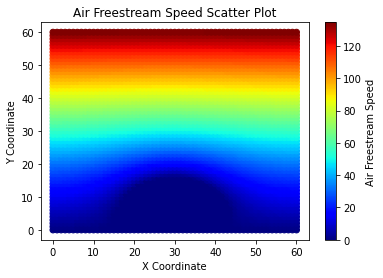

In [19]:
# Flatten the matrix and corresponding coordinates
flattened_speeds = psis.flatten()

# Generate x, y coordinates for scatter plot
x_coords, y_coords = np.meshgrid(range(psis.shape[0]), range(psis.shape[1]))

flattened_x_coords = x_coords.flatten()
flattened_y_coords = y_coords.flatten()

# Create scatter plot
plt.scatter(flattened_x_coords, flattened_y_coords, c=flattened_speeds, cmap='jet')
plt.colorbar(label='Air Freestream Speed')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Air Freestream Speed Scatter Plot')

# Show the plot
plt.show()

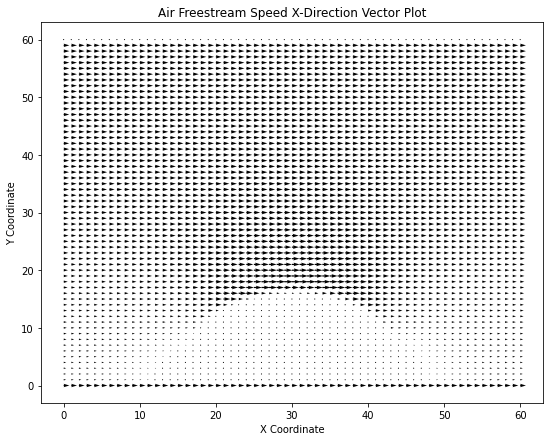

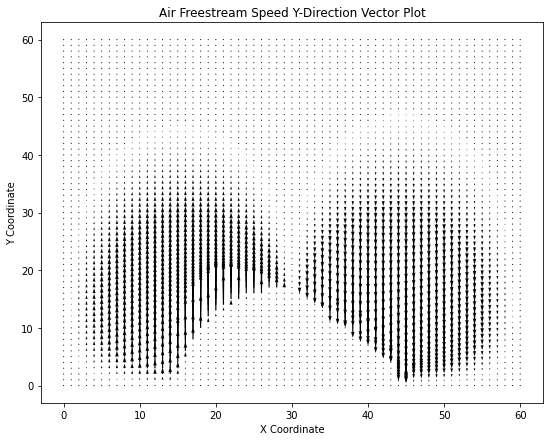

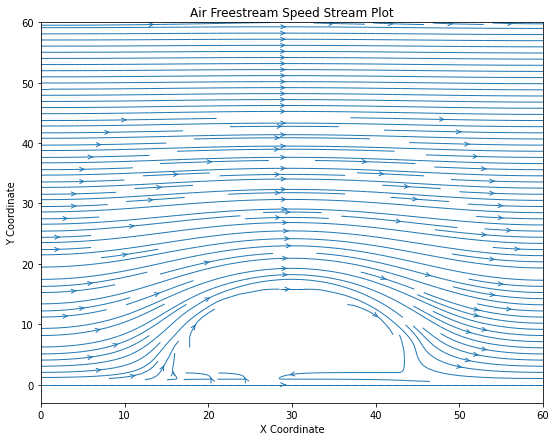

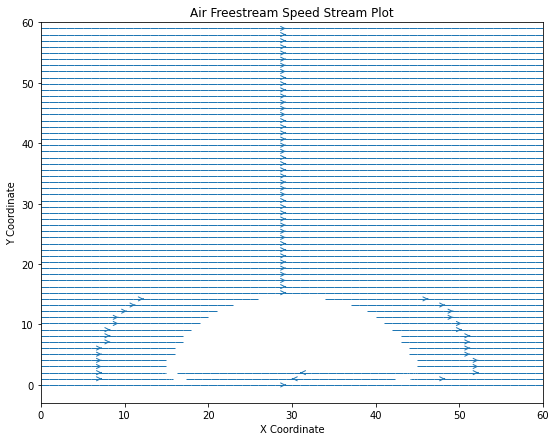

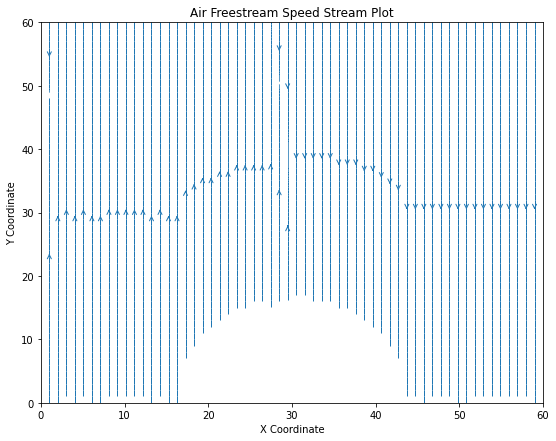

In [20]:
# funcão que deriva a matriz psi em x
def derivada_x(matriz, delta_x):
    matriz_derivada = deepcopy(matriz)
    # itera sobre as linhas ao contrario
    for j in range(len(matriz_derivada)-1, -1, -1):
        for i in range(len(matriz_derivada[0])):
            # se for a primeira coluna ou a última coluna, derivada vale 0
            if i == 0 or i == len(matriz_derivada[0])-1:
                matriz_derivada[j][i] = 0
            else:
                # derivada central
                matriz_derivada[j][i] = (matriz[j][i+1] - matriz[j][i-1]) / (2 * delta_x)
    return matriz_derivada

# funcao que deriva a matriz psi em y
def derivada_y(matriz, delta_x):
    matriz_derivada = deepcopy(matriz)
    for j in range(len(matriz_derivada)-1, -1, -1):
        for i in range(len(matriz_derivada[0])):
            # se for a primeira linha
            if j == 0:
                matriz_derivada[j][i] = V
            # se for a última linha
            elif j == len(matriz_derivada)-1:
                matriz_derivada[j][i] = 0
            else:
                # derivada central
                matriz_derivada[j][i] = (matriz[j+1][i] - matriz[j-1][i]) / (2 * delta_x)
    return matriz_derivada

# derivadas de psi em x e y
u = derivada_y(psis, delta_x)
v = -derivada_x(psis, delta_x)

# plot dos vetores do campo de velocidade em x
plt.figure(figsize=(9 ,7))
plt.quiver(x_coords, y_coords, u, np.zeros(u.shape))
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Air Freestream Speed X-Direction Vector Plot')
plt.show()

# plot dos vetores do campo de velocidade em y
plt.figure(figsize=(9 ,7))
plt.quiver(x_coords, y_coords, np.zeros(v.shape), v)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Air Freestream Speed Y-Direction Vector Plot')
plt.show()


# plot do campo de velocidade
plt.figure(figsize=(9 ,7))
plt.streamplot(x_coords, y_coords, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Air Freestream Speed Stream Plot')
plt.show()

# plot de cada componente do campo de velocidade
plt.figure(figsize=(9 ,7))
plt.streamplot(x_coords, y_coords, u, np.zeros(u.shape), density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Air Freestream Speed Stream Plot')
plt.show()

# plot de cada componente do campo de velocidade
plt.figure(figsize=(9 ,7))
plt.streamplot(x_coords, y_coords, np.zeros(v.shape), v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Air Freestream Speed Stream Plot')
plt.show()





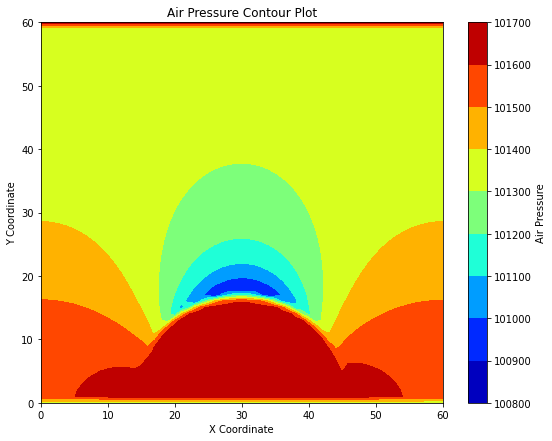

In [21]:
# calcula pressao baseado em:
# p = patm + rho*(gamma_ar-1/gamma_ar)*(V**2/2 - (np.sqrt(u**2+v**2))**2/2)

# funcao que calcula a pressao
def calc_pressao(matriz, u, v, delta_x):
    matriz_pressao = deepcopy(matriz)
    for j in range(len(matriz_pressao)-1, -1, -1):
        for i in range(len(matriz_pressao[0])):
            matriz_pressao[j][i] = patm + rho*(gamma_ar-1/gamma_ar)*(V**2/2 - (np.sqrt(u[j][i]**2+v[j][i]**2))**2/2)
    return matriz_pressao

# calcula a pressao
pressao = calc_pressao(psis, u, v, delta_x)

# plot da pressao
plt.figure(figsize=(9 ,7))
plt.contourf(x_coords, y_coords, pressao, cmap='jet')
plt.colorbar(label='Air Pressure')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Air Pressure Contour Plot')
plt.show()



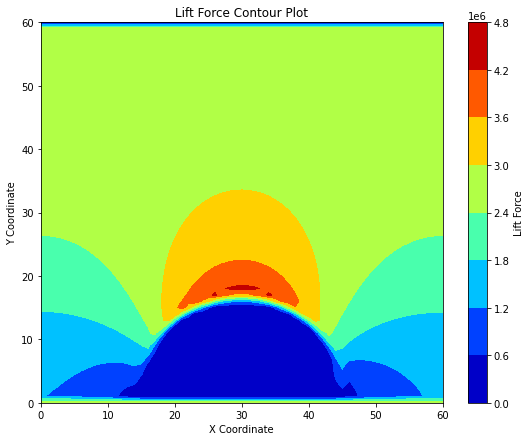

Lift Force Total:  -167894.61046999466 N


In [22]:
# calcula a forca de lift
# baseado em F_{\text {lift }}=\int_A \vec{P} \cdot \vec{n} d A

# funcao que calcula a forca de lift
def forca_lift(matriz, u, v, delta_x):
    matriz_forca_lift = deepcopy(matriz)
    for j in range(len(matriz_forca_lift)-1, -1, -1):
        for i in range(len(matriz_forca_lift[0])):
            matriz_forca_lift[j][i] = pressao[j][i] * np.sqrt(u[j][i]**2+v[j][i]**2)
    return matriz_forca_lift

# calcula a forca de lift
forca_lift = forca_lift(psis, u, v, delta_x)

# plot da forca de lift
plt.figure(figsize=(9 ,7))
plt.contourf(x_coords, y_coords, forca_lift, cmap='jet')
plt.colorbar(label='Lift Force')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Lift Force Contour Plot')
plt.show()

# calcula a forca de lift total sobre o veiculo
# somatória das da pressão ao longo da superfície da carroceria, multiplicada pelo comprimento de cada segmento de superfície
def calc_forca_lift_total():
    forca_lift_total = 0
    for j in range(len(pressao)-1, -1, -1):
        for i in range(len(pressao[0])):
            if (i,j) in pontos_ao_redor:
                forca_lift_total += (pressao[j][i] - patm)* np.sqrt(u[j][i]**2+v[j][i]**2)
    return forca_lift_total * (2*np.pi*L/2+L)

# calcula a forca de lift total sobre o veiculo
forca_lift_total = calc_forca_lift_total()

# print da forca de lift total sobre o veiculo
print('Lift Force Total: ', forca_lift_total, 'N')


## Parte II

#### Equações:

$$\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}-\frac{\rho \cdot c_p}{k} \cdot\left(u \cdot \frac{\partial T}{\partial x}+v \cdot \frac{\partial T}{\partial y} \right)=0$$

`Primeiras derivadas:`

- Se u $>0$

    $$ \partial_x T=\left(T_{i j}-T_{i-1 j}\right) / \Delta x $$

- Se u $<0$

    $$ \partial_x T=\left(T_{i+1 j}-T_{i j}\right) / \Delta x$$

- Se v $>0$

    $$ \partial_y T=\left(T_{i j}-T_{i-1 j}\right) / \Delta y $$
 
- Se v $<0$

    $$ \partial_y T=\left(T_{i+1 j}-T_{i j}\right) / \Delta y$$
 
---



`Para posições fora das bordas:`

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 T}{\partial x^2}\right|_{i, j}=\frac{T_{i+1, j}-2 T_{i, j}+T_{i-1, j}}{\Delta x^2}\\
\left.\frac{\partial^2 T}{\partial y^2}\right|_{i, j}=\frac{T_{i, j+1}-2 T_{i, j}+T_{i, j-1}}{\Delta y^2}
\end{array}\right.
$$

`E a equação de diferença de LaPlace:`

- Se $u>0$ e $v>0$:

    $$T_{i, j}=\frac{T_{i+1,j} +  \left(T_{i-1,j}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} \right) +T_{i,j+1} + T_{i,j-1}}{\left(4 + \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u<0$ e $v>0$:

    $$T_{i, j}=\frac{ \left(T_{i+1,j}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} \right) +  \left(T_{i-1,j} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} \right) +T_{i,j+1} + T_{i,j-1}}{\left(4 - \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u>0$ e $v<0$:

    $$T_{i, j}=\frac{ \left(T_{i+1,j}-T_{i,j+1}\frac{v \Delta x \rho c_p}{k} \right) +  \left(T_{i-1,j} + T_{i-1,j}\frac{u \Delta x \rho c_p}{k} \right) +T_{i,j+1} + T_{i,j-1}}{\left(4 + \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u<0$ e $v<0$:
    
    $$T_{i, j}=\frac{T_{i-1,j} +  \left(T_{i+1,j}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} \right) +T_{i,j+1} + T_{i,j-1}}{\left(4 - \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$

---

`Para borda esquerda` $T=T_{fora}$

---



`Para borda superior` $\left(\frac{\partial T}{\partial y}=0\right)$

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 T}{\partial x^2}\right|_{i, j}=\frac{T_{i+1, j}-2 T_{i, j}+T_{i-1, j}}{\Delta x^2}\\
\left.\frac{\partial^2 T}{\partial y^2}\right|_{i, j}=\frac{2}{\Delta y^2} \left(T_{i,j-1}-T_{i,j}\right)
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

- Se $u>0$ e $v>0$:

    $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u<0$ e $v>0$:

    $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u>0$ e $v<0$:

    $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u<0$ e $v<0$:
    
    $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$
    
---



`Borda direita` $\left(\frac{\partial T}{\partial x}=0\right)$

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 \psi}{\partial x^2}\right|_{i, j}=\frac{2}{\Delta x^2} \left(T_{i-1,j}-T_{i,j}\right)\\
\left.\frac{\partial^2 \psi}{\partial y^2}\right|_{i, j}=\frac{T_{i, j+1}-2 T_{i, j}+T_{i, j-1}}{\Delta y^2}
\end{array}\right.
$$

`E a equação de diferença de LaPlace:`

- Se $u>0$ e $v>0$:

    $$T_{i, j}=\frac{2T_{i-1,j}+T_{i,j+1}+T_{i,j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u<0$ e $v>0$:

    $$T_{i, j}=\frac{2T_{i-1,j}+T_{i,j+1}+T_{i,j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u>0$ e $v<0$:

    $$T_{i, j}=\frac{2T_{i-1,j}+T_{i,j+1}+T_{i,j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u<0$ e $v<0$:
    
    $$T_{i, j}=\frac{2T_{i-1,j}+T_{i,j+1}+T_{i,j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$

---



`Para borda inferior` $\left(\frac{\partial T}{\partial y}=0 \right)$

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 T}{\partial x^2}\right|_{i, j}=\frac{T_{i+1, j}-2 T_{i, j}+T_{i-1, j}}{\Delta x^2}\\
\left.\frac{\partial^2 T}{\partial y^2}\right|_{i, j}=\frac{2}{\Delta y^2} \left(T_{i,j+1}-T_{i,j}\right)
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

- Se $u>0$ e $v>0$:

    $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j+1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u<0$ e $v>0$:

    $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j+1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u>0$ e $v<0$:

    $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j+1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u<0$ e $v<0$:
    
    $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j+1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$

---

`Canto Superior Esquerdo e Canto Inferior Esquerdo` $T = T_{fora}$

---




`Canto Superior Direito` $\left(\frac{\partial T}{\partial y}=0\right)$ `e` $\left(\frac{\partial T}{\partial x}=0\right)$

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 T}{\partial x^2}\right|_{i, j}=\frac{2}{\Delta x^2} \left(T_{i-1,j}-T_{i,j}\right)\\
\left.\frac{\partial^2 T}{\partial y^2}\right|_{i, j}=\frac{2}{\Delta y^2} \left(T_{i,j-1}-T_{i,j}\right)
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

- Se $u>0$ e $v>0$:

    $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{u \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u<0$ e $v>0$:

    $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{u \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u>0$ e $v<0$:

    $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{u \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u<0$ e $v<0$:
    
    $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{u \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$





---

`Canto Inferior Direito` $\left(\frac{\partial T}{\partial y}=0\right)$ `e` $\left(\frac{\partial T}{\partial x}=0\right)$

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 T}{\partial x^2}\right|_{i, j}=\frac{2}{\Delta x^2} \left(T_{i-1,j}-T_{i,j}\right)\\
\left.\frac{\partial^2 T}{\partial y^2}\right|_{i, j}=\frac{2}{\Delta y^2} \left(T_{i,j+1}-T_{i,j}\right)
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

- Se $u>0$ e $v>0$:

    $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j+1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u<0$ e $v>0$:

    $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j+1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u>0$ e $v<0$:

    $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j+1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$

- Se $u<0$ e $v<0$:
    
    $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j+1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$

##### Para os pontos ao redor do carro

    Imediatamente acima e a esquerda do semi-circulo:

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 T}{\partial x^2}\right|_{i, j}=\frac{2}{a \Delta x^2 (a+1)} \left(T_{dentro}+aT_{i-1,j}-T_{i,j} (1+a) \right)\\
\left.\frac{\partial^2 T}{\partial y^2}\right|_{i, j}=\frac{2}{b \Delta y^2 (b+1)}\left(T_{dentro}+ b T_{i, j+1}- T_{i, j} (1+b) \right)
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

- Se $u>0$ e $v>0$:

    <!-- $$T_{i, j}=\frac{\frac{2}{a (a+1)} \left(T_{dentro}+aT_{i-1,j}-T_{i,j} (1+a) \right)+\frac{2}{b (b+1)}\left(T_{dentro}+ b T_{i, j+1}- T_{i, j} (1+b) \right)+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} - T_{i, j}\frac{u \Delta x \rho c_p}{k} - T_{i, j}\frac{v \Delta x \rho c_p}{k}}{} $$
    $$T_{i, j}=\frac{\frac{2 T_{dentro}}{a (a+1)} + \frac{2 T_{i-1,j}}{(a+1)} - \frac{2 T_{i,j}}{a} + \frac{2 T_{dentro}}{b (b+1)} + \frac{2 T_{i, j+1}}{(b+1)} - \frac{2 T_{i, j}}{b} + T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} - T_{i, j}\frac{u \Delta x \rho c_p}{k} - T_{i, j}\frac{v \Delta x \rho c_p}{k}}{} $$
    $$T_{i, j}=\frac{T_{dentro}(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}) + T_{i-1,j}(\frac{2 }{(a+1)}+\frac{u \Delta x \rho c_p}{k}) - T_{i,j}(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k})  + \frac{2 T_{i, j+1}}{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{} $$
    $$T_{i, j}=\frac{T_{dentro}(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}) + T_{i-1,j}(\frac{2 }{(a+1)}+\frac{u \Delta x \rho c_p}{k}) - T_{i,j}(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k})  + \frac{2 T_{i, j+1}}{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{} $$ -->
    
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i-1,j}\frac{2 }{(a+1)}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$


- Se $u<0$ e $v>0$:

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i-1,j}\frac{2 }{(a+1)}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2 }{a}+\frac{2 }{b}-\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$

- Se $u>0$ e $v<0$:

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i-1,j}\frac{2 }{(a+1)}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$

- Se $u<0$ e $v<0$:
    
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i-1,j}\frac{2 }{(a+1)}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2 }{a}+\frac{2 }{b}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$


`OBS:` Caso o ponto se encontre adequadamente próximo ao motor, $T_{dentro}$ deve ser substituído por $T_{motor}$.



---

    Imediatamente acima e a direita do semi-circulo:

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 T}{\partial x^2}\right|_{i, j}=\frac{2}{a \Delta x^2 (a+1)} \left(T_{dentro}+aT_{i+1,j}-T_{i,j} (1+a) \right)\\
\left.\frac{\partial^2 T}{\partial y^2}\right|_{i, j}=\frac{2}{b \Delta y^2 (b+1)}\left(T_{dentro}+ b T_{i, j+1}- T_{i, j} (1+b) \right)
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

- Se $u>0$ e $v>0$:

    <!-- $$T_{i, j}=\frac{\frac{2}{a (a+1)} \left(T_{dentro}+aT_{i-1,j}-T_{i,j} (1+a) \right)+\frac{2}{b (b+1)}\left(T_{dentro}+ b T_{i, j+1}- T_{i, j} (1+b) \right)+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} - T_{i, j}\frac{u \Delta x \rho c_p}{k} - T_{i, j}\frac{v \Delta x \rho c_p}{k}}{} $$
    $$T_{i, j}=\frac{\frac{2 T_{dentro}}{a (a+1)} + \frac{2 T_{i-1,j}}{(a+1)} - \frac{2 T_{i,j}}{a} + \frac{2 T_{dentro}}{b (b+1)} + \frac{2 T_{i, j+1}}{(b+1)} - \frac{2 T_{i, j}}{b} + T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} - T_{i, j}\frac{u \Delta x \rho c_p}{k} - T_{i, j}\frac{v \Delta x \rho c_p}{k}}{} $$
    $$T_{i, j}=\frac{T_{dentro}(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}) + T_{i-1,j}(\frac{2 }{(a+1)}+\frac{u \Delta x \rho c_p}{k}) - T_{i,j}(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k})  + \frac{2 T_{i, j+1}}{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{} $$
    $$T_{i, j}=\frac{T_{dentro}(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}) + T_{i-1,j}(\frac{2 }{(a+1)}+\frac{u \Delta x \rho c_p}{k}) - T_{i,j}(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k})  + \frac{2 T_{i, j+1}}{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{} $$ -->
    
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i+1,j}\frac{2 }{(a+1)}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$


- Se $u<0$ e $v>0$:

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i+1,j}\frac{2 }{(a+1)}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2 }{a}+\frac{2 }{b}-\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$

- Se $u>0$ e $v<0$:

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i+1,j}\frac{2 }{(a+1)}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$

- Se $u<0$ e $v<0$:
    
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i+1,j}\frac{2 }{(a+1)}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2 }{a}+\frac{2 }{b}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$

`OBS:` Caso o ponto se encontre adequadamente próximo ao motor, $T_{dentro}$ deve ser substituído por $T_{motor}$.

---




    Imediatamente a direita do semi-circulo:

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 T}{\partial x^2}\right|_{i, j}=\frac{2}{a \Delta x^2 (a+1)} \left(T_{dentro}+aT_{i+1,j}-T_{i,j} (1+a) \right)\\
\left.\frac{\partial^2 T}{\partial y^2}\right|_{i, j}=\frac{T_{i, j+1}-2 T_{i, j}+T_{i, j-1}}{\Delta y^2}
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

- Se $u>0$ e $v>0$:

    <!-- $$T_{i, j}=\frac{\frac{2}{a (a+1)} \left(T_{dentro}+aT_{i-1,j}-T_{i,j} (1+a) \right)+\frac{2}{b (b+1)}\left(T_{dentro}+ b T_{i, j+1}- T_{i, j} (1+b) \right)+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} - T_{i, j}\frac{u \Delta x \rho c_p}{k} - T_{i, j}\frac{v \Delta x \rho c_p}{k}}{} $$
    $$T_{i, j}=\frac{\frac{2 T_{dentro}}{a (a+1)} + \frac{2 T_{i-1,j}}{(a+1)} - \frac{2 T_{i,j}}{a} + \frac{2 T_{dentro}}{b (b+1)} + \frac{2 T_{i, j+1}}{(b+1)} - \frac{2 T_{i, j}}{b} + T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} - T_{i, j}\frac{u \Delta x \rho c_p}{k} - T_{i, j}\frac{v \Delta x \rho c_p}{k}}{} $$
    $$T_{i, j}=\frac{T_{dentro}(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}) + T_{i-1,j}(\frac{2 }{(a+1)}+\frac{u \Delta x \rho c_p}{k}) - T_{i,j}(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k})  + \frac{2 T_{i, j+1}}{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{} $$
    $$T_{i, j}=\frac{T_{dentro}(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}) + T_{i-1,j}(\frac{2 }{(a+1)}+\frac{u \Delta x \rho c_p}{k}) - T_{i,j}(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k})  + \frac{2 T_{i, j+1}}{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{} $$ 
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) +T_{i,j}(\frac{-2}{a}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k})+ T_{i+1,j}\frac{2 }{(a+1)}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{}{}\right)} $$
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) +T_{i,j}(-2-\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k})+ T_{i+1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{}{}\right)} $$ -->

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i+1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$


- Se $u<0$ e $v>0$:

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i+1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$

- Se $u>0$ e $v<0$:

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i+1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}+\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$

- Se $u<0$ e $v<0$:
    
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i+1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$

`OBS:` Caso o ponto se encontre adequadamente próximo ao motor, $T_{dentro}$ deve ser substituído por $T_{motor}$.





---


    Imediatamente a esquerda do semi-circulo:


$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 T}{\partial x^2}\right|_{i, j}=\frac{2}{a \Delta x^2 (a+1)} \left(T_{dentro}+aT_{i-1,j}-T_{i,j} (1+a) \right)\\
\left.\frac{\partial^2 T}{\partial y^2}\right|_{i, j}=\frac{T_{i, j+1}-2 T_{i, j}+T_{i, j-1}}{\Delta y^2}
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

- Se $u>0$ e $v>0$:

    <!-- $$T_{i, j}=\frac{\frac{2}{a (a+1)} \left(T_{dentro}+aT_{i-1,j}-T_{i,j} (1+a) \right)+\frac{2}{b (b+1)}\left(T_{dentro}+ b T_{i, j+1}- T_{i, j} (1+b) \right)+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} - T_{i, j}\frac{u \Delta x \rho c_p}{k} - T_{i, j}\frac{v \Delta x \rho c_p}{k}}{} $$
    $$T_{i, j}=\frac{\frac{2 T_{dentro}}{a (a+1)} + \frac{2 T_{i-1,j}}{(a+1)} - \frac{2 T_{i,j}}{a} + \frac{2 T_{dentro}}{b (b+1)} + \frac{2 T_{i, j+1}}{(b+1)} - \frac{2 T_{i, j}}{b} + T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} - T_{i, j}\frac{u \Delta x \rho c_p}{k} - T_{i, j}\frac{v \Delta x \rho c_p}{k}}{} $$
    $$T_{i, j}=\frac{T_{dentro}(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}) + T_{i-1,j}(\frac{2 }{(a+1)}+\frac{u \Delta x \rho c_p}{k}) - T_{i,j}(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k})  + \frac{2 T_{i, j+1}}{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{} $$
    $$T_{i, j}=\frac{T_{dentro}(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}) + T_{i-1,j}(\frac{2 }{(a+1)}+\frac{u \Delta x \rho c_p}{k}) - T_{i,j}(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k})  + \frac{2 T_{i, j+1}}{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{} $$ 
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) +T_{i,j}(\frac{-2}{a}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k})+ T_{i+1,j}\frac{2 }{(a+1)}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{}{}\right)} $$
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) +T_{i,j}(-2-\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k})+ T_{i+1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{}{}\right)} $$ -->

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i-1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$


- Se $u<0$ e $v>0$:

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i-1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$

- Se $u>0$ e $v<0$:

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i-1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}+\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$

- Se $u<0$ e $v<0$:
    
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i-1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$

`OBS:` Caso o ponto se encontre adequadamente próximo ao motor, $T_{dentro}$ deve ser substituído por $T_{motor}$.




---


    Imediatamente acima do semi-circulo:

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 T}{\partial x^2}\right|_{i, j}=\frac{T_{i+1, j}-2 T_{i, j}+T_{i-1, j}}{\Delta x^2}\\
\left.\frac{\partial^2 T}{\partial y^2}\right|_{i, j}=\frac{2}{a \Delta y^2 (a+1)}\left(T_{dentro} +a T_{i, j+1}- T_{i, j} (1+a) \right)
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

- Se $u>0$ e $v>0$:

    <!-- $$T_{i, j}=\frac{\frac{2}{a (a+1)} \left(T_{dentro}+aT_{i-1,j}-T_{i,j} (1+a) \right)+\frac{2}{b (b+1)}\left(T_{dentro}+ b T_{i, j+1}- T_{i, j} (1+b) \right)+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} - T_{i, j}\frac{u \Delta x \rho c_p}{k} - T_{i, j}\frac{v \Delta x \rho c_p}{k}}{} $$
    $$T_{i, j}=\frac{\frac{2 T_{dentro}}{a (a+1)} + \frac{2 T_{i-1,j}}{(a+1)} - \frac{2 T_{i,j}}{a} + \frac{2 T_{dentro}}{b (b+1)} + \frac{2 T_{i, j+1}}{(b+1)} - \frac{2 T_{i, j}}{b} + T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} - T_{i, j}\frac{u \Delta x \rho c_p}{k} - T_{i, j}\frac{v \Delta x \rho c_p}{k}}{} $$
    $$T_{i, j}=\frac{T_{dentro}(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}) + T_{i-1,j}(\frac{2 }{(a+1)}+\frac{u \Delta x \rho c_p}{k}) - T_{i,j}(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k})  + \frac{2 T_{i, j+1}}{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{} $$
    $$T_{i, j}=\frac{T_{dentro}(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}) + T_{i-1,j}(\frac{2 }{(a+1)}+\frac{u \Delta x \rho c_p}{k}) - T_{i,j}(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k})  + \frac{2 T_{i, j+1}}{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{} $$ 
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) +T_{i,j}(\frac{-2}{a}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k})+ T_{i+1,j}\frac{2 }{(a+1)}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{}{}\right)} $$
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) +T_{i,j}(-2-\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k})+ T_{i+1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{}{}\right)} $$ -->

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i,j+1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$


- Se $u<0$ e $v>0$:

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i,j+1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$

- Se $u>0$ e $v<0$:

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i,j+1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}+\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$

- Se $u<0$ e $v<0$:
    
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i,j+1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$

`OBS:` Caso o ponto se encontre adequadamente próximo ao motor, $T_{dentro}$ deve ser substituído por $T_{motor}$.



---


    Imediatamente abaixo do semi-círculo:

$$
\left\{\begin{array}{l}
\left.\frac{\partial^2 T}{\partial x^2}\right|_{i, j}=\frac{T_{i+1, j}-2 T_{i, j}+T_{i-1, j}}{\Delta x^2}\\
\left.\frac{\partial^2 T}{\partial y^2}\right|_{i, j}=\frac{2}{a \Delta y^2 (a+1)} (T_{dentro} + a T_{i, j-1}- T_{i, j} (1+a))
\end{array}\right.
$$

    E a equação de diferença de LaPlace:

- Se $u>0$ e $v>0$:

    <!-- $$T_{i, j}=\frac{\frac{2}{a (a+1)} \left(T_{dentro}+aT_{i-1,j}-T_{i,j} (1+a) \right)+\frac{2}{b (b+1)}\left(T_{dentro}+ b T_{i, j+1}- T_{i, j} (1+b) \right)+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} - T_{i, j}\frac{u \Delta x \rho c_p}{k} - T_{i, j}\frac{v \Delta x \rho c_p}{k}}{} $$
    $$T_{i, j}=\frac{\frac{2 T_{dentro}}{a (a+1)} + \frac{2 T_{i-1,j}}{(a+1)} - \frac{2 T_{i,j}}{a} + \frac{2 T_{dentro}}{b (b+1)} + \frac{2 T_{i, j+1}}{(b+1)} - \frac{2 T_{i, j}}{b} + T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} - T_{i, j}\frac{u \Delta x \rho c_p}{k} - T_{i, j}\frac{v \Delta x \rho c_p}{k}}{} $$
    $$T_{i, j}=\frac{T_{dentro}(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}) + T_{i-1,j}(\frac{2 }{(a+1)}+\frac{u \Delta x \rho c_p}{k}) - T_{i,j}(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k})  + \frac{2 T_{i, j+1}}{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{} $$
    $$T_{i, j}=\frac{T_{dentro}(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}) + T_{i-1,j}(\frac{2 }{(a+1)}+\frac{u \Delta x \rho c_p}{k}) - T_{i,j}(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k})  + \frac{2 T_{i, j+1}}{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{} $$ 
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) +T_{i,j}(\frac{-2}{a}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k})+ T_{i+1,j}\frac{2 }{(a+1)}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{}{}\right)} $$
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) +T_{i,j}(-2-\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k})+ T_{i+1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{}{}\right)} $$ -->

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i,j-1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$


- Se $u<0$ e $v>0$:

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i,j-1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$

- Se $u>0$ e $v<0$:

    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i,j-1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}+\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$

- Se $u<0$ e $v<0$:
    
    $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + T_{i,j-1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$

`OBS:` Caso o ponto se encontre adequadamente próximo ao motor, $T_{dentro}$ deve ser substituído por $T_{motor}$.


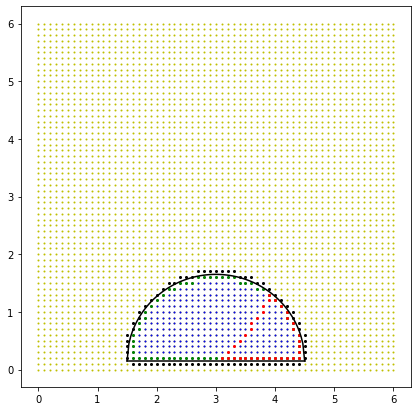

In [23]:
lambda_s = 1.15 # fator de peso da sobrerelaxação
tol = 1e-2 # tolerância
delta_x = 0.1 # L/8 # delta x = delta y -> discretização
k=k_ar
malha=criar_matriz_malha(delta_x)
pontos_ao_redor=encontrar_pontos_fora(malha)
pontos_interior=encontrar_pontos_interior(malha)
pontos_im_dentro=encontrar_pontos_im_dentro(malha)
pontos_dentro_motor = encontrar_pontos_dentro_motor(malha)

plotar_matriz(
    matriz_malha=malha,
    pontos_interior=pontos_interior,
    pontos_im_dentro=pontos_im_dentro,
    pontos_ao_redor=pontos_ao_redor,
    pontos_dentro_motor=pontos_dentro_motor
)

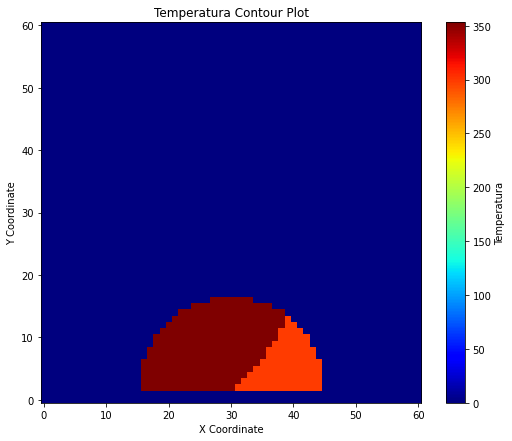

In [24]:
from matplotlib import cm


matriz_inicial_temperatura = np.array(criar_matriz_temperatura(malha))

# plota a matriz de temperatura, invertendo o eixo y
plt.figure(figsize=(9 ,7))
plt.imshow(matriz_inicial_temperatura, cmap=cm.jet, origin='lower')
plt.colorbar(label='Temperatura')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Temperatura Contour Plot')
plt.show()


In [25]:
# definindo funções que calculam T
# Se $u>0$ e $v>0$  $$T_{i, j}=\frac{T_{i+1,j} +  \left(T_{i-1,j}+T_{i-1,j}\frac{u \Delta x \rho cp_ar}{k} + T_{i,j-1}\frac{v \Delta x \rho cp_ar}{k} \right) +T_{i,j+1} + T_{i,j-1}}{\left(4 + \frac{u \Delta x \rho cp_ar}{k} + \frac{v \Delta x \rho cp_ar}{k}  \right)} $$
# Se $u<0$ e $v>0$: $$T_{i, j}=\frac{ \left(T_{i+1,j}-T_{i+1,j}\frac{u \Delta x \rho cp_ar}{k} \right) +  \left(T_{i-1,j} + T_{i,j-1}\frac{v \Delta x \rho cp_ar}{k} \right) +T_{i,j+1} + T_{i,j-1}}{\left(4 - \frac{u \Delta x \rho cp_ar}{k} + \frac{v \Delta x \rho cp_ar}{k}  \right)} $$
# Se $u>0$ e $v<0$: $$T_{i, j}=\frac{ \left(T_{i+1,j}-T_{i,j+1}\frac{v \Delta x \rho cp_ar}{k} \right) +  \left(T_{i-1,j} + T_{i-1,j}\frac{u \Delta x \rho cp_ar}{k} \right) +T_{i,j+1} + T_{i,j-1}}{\left(4 + \frac{u \Delta x \rho cp_ar}{k} - \frac{v \Delta x \rho cp_ar}{k}  \right)} $$
# Se $u<0$ e $v<0$: $$T_{i, j}=\frac{T_{i-1,j} +  \left(T_{i+1,j}-T_{i+1,j}\frac{u \Delta x \rho cp_ar}{k} - T_{i,j+1}\frac{v \Delta x \rho cp_ar}{k} \right) +T_{i,j+1} + T_{i,j-1}}{\left(4 - \frac{u \Delta x \rho cp_ar}{k} - \frac{v \Delta x \rho cp_ar}{k}  \right)} $$
def T_geral(matriz, i, j, u, v):
    if u>=0 and v>=0:
        T = (matriz[j][i+1] + (matriz[j][i-1] + matriz[j][i-1]*u*delta_x*rho*cp_ar/k + matriz[j-1][i]*v*delta_x*rho*cp_ar/k) + matriz[j+1][i] + matriz[j-1][i])/(4 + u*delta_x*rho*cp_ar/k + v*delta_x*rho*cp_ar/k)
    elif u<=0 and v>=0:
        T = ((matriz[j][i+1] - matriz[j][i+1]*u*delta_x*rho*cp_ar/k) + (matriz[j][i-1] + matriz[j-1][i]*v*delta_x*rho*cp_ar/k) + matriz[j+1][i] + matriz[j-1][i])/(4 - u*delta_x*rho*cp_ar/k + v*delta_x*rho*cp_ar/k)
    elif u>=0 and v<=0:
        T = ((matriz[j][i+1] - matriz[j+1][i]*v*delta_x*rho*cp_ar/k) + (matriz[j][i-1] + matriz[j][i-1]*u*delta_x*rho*cp_ar/k) + matriz[j+1][i] + matriz[j-1][i])/(4 + u*delta_x*rho*cp_ar/k - v*delta_x*rho*cp_ar/k)
    elif u<=0 and v<=0:
        T = (matriz[j][i-1] + (matriz[j][i+1] - matriz[j][i+1]*u*delta_x*rho*cp_ar/k - matriz[j+1][i]*v*delta_x*rho*cp_ar/k) + matriz[j+1][i] + matriz[j-1][i])/(4 - u*delta_x*rho*cp_ar/k - v*delta_x*rho*cp_ar/k)
    return T

def T_esquerda(matriz, i, j, u, v):
    return Tfora

# Se $u>0$ e $v>0$: $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$
# Se $u<0$ e $v>0$: $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$
# Se $u>0$ e $v<0$: $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$
# Se $u<0$ e $v<0$: $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$
def T_superior(matriz, i, j, u, v):
    if u>=0:
        T = (matriz[j][i+1] + matriz[j][i-1] + 2*matriz[j-1][i] + matriz[j][i-1]*u*delta_x*rho*cp_ar/k + matriz[j-1][i]*v*delta_x*rho*cp_ar/k)/(4 + u*delta_x*rho*cp_ar/k + v*delta_x*rho*cp_ar/k)
    elif u<=0:
        T = (matriz[j][i+1] + matriz[j][i-1] + 2*matriz[j-1][i] - matriz[j][i+1]*u*delta_x*rho*cp_ar/k + matriz[j-1][i]*v*delta_x*rho*cp_ar/k)/(4 - u*delta_x*rho*cp_ar/k + v*delta_x*rho*cp_ar/k)
    return T

# Se $u>0$ e $v>0$: $$T_{i, j}=\frac{2T_{i-1,j}+T_{i,j+1}+T_{i,j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$
# Se $u<0$ e $v>0$: $$T_{i, j}=\frac{2T_{i-1,j}+T_{i,j+1}+T_{i,j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$
# Se $u>0$ e $v<0$: $$T_{i, j}=\frac{2T_{i-1,j}+T_{i,j+1}+T_{i,j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$
# Se $u<0$ e $v<0$: $$T_{i, j}=\frac{2T_{i-1,j}+T_{i,j+1}+T_{i,j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$
def T_direita(matriz, i, j, u, v):
    if v>=0:
        T = (2*matriz[j][i-1] + matriz[j+1][i] + matriz[j-1][i] + matriz[j][i-1]*u*delta_x*rho*cp_ar/k + matriz[j-1][i]*v*delta_x*rho*cp_ar/k)/(4 + u*delta_x*rho*cp_ar/k + v*delta_x*rho*cp_ar/k)
    elif v<=0:
        T = (2*matriz[j][i-1] + matriz[j+1][i] + matriz[j-1][i] + matriz[j][i-1]*u*delta_x*rho*cp_ar/k - matriz[j+1][i]*v*delta_x*rho*cp_ar/k)/(4 + u*delta_x*rho*cp_ar/k - v*delta_x*rho*cp_ar/k)
    return T


# - Se $u>0$ e $v>0$: $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j+1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$
# - Se $u<0$ e $v>0$: $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j+1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$
# - Se $u>0$ e $v<0$: $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j+1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$
# - Se $u<0$ e $v<0$: $$T_{i, j}=\frac{T_{i+1,j}+T_{i-1,j}+2T_{i,j+1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$
def T_inferior(matriz, i, j, u, v):
    if u>=0:
        T = (matriz[j][i+1] + matriz[j][i-1] + 2*matriz[j+1][i] + matriz[j][i-1]*u*delta_x*rho*cp_ar/k - matriz[j+1][i]*v*delta_x*rho*cp_ar/k)/(4 + u*delta_x*rho*cp_ar/k - v*delta_x*rho*cp_ar/k)
    elif u<=0:
        T = (matriz[j][i+1] + matriz[j][i-1] + 2*matriz[j+1][i] - matriz[j][i+1]*u*delta_x*rho*cp_ar/k - matriz[j+1][i]*v*delta_x*rho*cp_ar/k)/(4 - u*delta_x*rho*cp_ar/k - v*delta_x*rho*cp_ar/k)
    return T

# - Se $u>0$ e $v>0$: $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{u \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$
# - Se $u<0$ e $v>0$: $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{u \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$
# - Se $u>0$ e $v<0$: $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{u \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$
# - Se $u<0$ e $v<0$: $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{u \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$
def T_canto_superior_direito(matriz, i, j, u, v):
    T = (2*matriz[j][i-1] + 2*matriz[j-1][i] + matriz[j][i-1]*u*delta_x*rho*cp_ar/k + matriz[j-1][i]*v*delta_x*rho*cp_ar/k)/(4 + u*delta_x*rho*cp_ar/k + v*delta_x*rho*cp_ar/k)
    return T
    
# - Se $u>0$ e $v>0$: $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j+1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$
# - Se $u<0$ e $v>0$: $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j+1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} + \frac{v \Delta x \rho c_p}{k}  \right)} $$
# - Se $u>0$ e $v<0$: $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j+1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 + \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$
# - Se $u<0$ e $v<0$: $$T_{i, j}=\frac{2T_{i-1,j}+2T_{i,j+1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k}}{\left(4 - \frac{u \Delta x \rho c_p}{k} - \frac{v \Delta x \rho c_p}{k}  \right)} $$
def T_canto_inferior_direito(matriz, i, j, u, v):
    T = (2*matriz[j][i-1] + 2*matriz[j+1][i] + matriz[j][i-1]*u*delta_x*rho*cp_ar/k - matriz[j+1][i]*v*delta_x*rho*cp_ar/k)/(4 + u*delta_x*rho*cp_ar/k - v*delta_x*rho*cp_ar/k)
    return T

def T_fronteira_veiculo(matriz, i, j, u, v):
    if (i,j-1) in pontos_im_dentro and (i+1,j) in pontos_im_dentro:
        # acima e a esquerda
        # distancia ponto até circulo
        a = abs(i*delta_x - veiculo_inversa(i,j,j*delta_x))/delta_x
        b = abs(j*delta_x - veiculo(i*delta_x))/delta_x
        # retorna temperatura baseado em:
        # - Se $u>0$ e $v>0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) +
        # T_{i-1,j}\frac{2 }{(a+1)}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} +
        # T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u>=0 and v>=0:
            return (
                Tdentro * (2 / (a * (a + 1)) + 2 / (b * (b + 1)))
                + matriz[j][i - 1] * 2 / (a + 1)
                + matriz[j][i - 1] * u * delta_x * rho * cp_ar / k
                + matriz[j + 1][i] * 2 / (b + 1)
                + matriz[j - 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2/a)+(2/b)+(u*delta_x*rho*cp_ar/k)+(v*delta_x*rho*cp_ar/k)                
            )
        # - Se $u<0$ e $v>0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i-1,j}\frac{2 }{(a+1)}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2 }{a}+\frac{2 }{b}-\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u <= 0 and v >= 0:
            return (
                Tdentro * (2 / (a * (a + 1)) + 2 / (b * (b + 1)))
                + matriz[j - 1][i] * 2 / (a + 1)
                - matriz[j + 1][i] * u * delta_x * rho * cp_ar / k
                + matriz[j][i + 1] * 2 / (b + 1)
                + matriz[j][i - 1] * v * delta_x * rho * cp_ar / k
            ) / (
                (2/a)+(2/b)-(u*delta_x*rho*cp_ar/k)+(v*delta_x*rho*cp_ar/k)
            )
        # - Se $u>0$ e $v<0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i-1,j}\frac{2 }{(a+1)}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2 }{a}+\frac{2 }{b}+\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u >= 0 and v <= 0:
            return (
                Tdentro * (2 / (a * (a + 1)) + 2 / (b * (b + 1)))
                + matriz[j - 1][i] * 2 / (a + 1)
                + matriz[j - 1][i] * u * delta_x * rho * cp_ar / k
                + matriz[j][i + 1] * 2 / (b + 1)
                - matriz[j][i + 1] * v * delta_x * rho * cp_ar / k
            ) / (
                (2/a)+(2/b)+(u*delta_x*rho*cp_ar/k)-(v*delta_x*rho*cp_ar/k)
            )
        # - Se $u<0$ e $v<0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i-1,j}\frac{2 }{(a+1)}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2 }{a}+\frac{2 }{b}-\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u <= 0 and v <= 0:
            return (
                Tdentro * (2 / (a * (a + 1)) + 2 / (b * (b + 1)))
                + matriz[j - 1][i] * 2 / (a + 1)
                - matriz[j + 1][i] * u * delta_x * rho * cp_ar / k
                + matriz[j][i + 1] * 2 / (b + 1)
                - matriz[j][i + 1] * v * delta_x * rho * cp_ar / k
            ) / (
                (2/a)+(2/b)-(u*delta_x*rho*cp_ar/k)-(v*delta_x*rho*cp_ar/k)
            )
    elif (i,j-1) in pontos_im_dentro and (i-1,j) in pontos_im_dentro:
        # acima e a direita
        # distancia ponto até circulo
        a = abs(i*delta_x - veiculo_inversa(i,j,j*delta_x))/delta_x
        b = abs(j*delta_x - veiculo(i*delta_x))/delta_x
        # checa se ponto está ao redor motor e define a temperature como 
        # a temperatura do motor ou a temperatura de dentro
        Tx = Tmotor if (i-1,j) in pontos_dentro_motor else Tdentro
        Ty = Tmotor if (i,j-1) in pontos_dentro_motor else Tdentro
        # - Se $u>0$ e $v>0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i+1,j}\frac{2 }{(a+1)}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2bk+2ak+abu\Delta x \rho c_p + abv\Delta x \rho c_p}{abk}\right)} $$
        if u >= 0 and v >= 0:
            return (
                Tx * (2 / (a * (a + 1))) + Ty * (2 / (b * (b + 1)))
                + matriz[j][i + 1] * 2 / (a + 1)
                + matriz[j][i - 1] * u * delta_x * rho * cp_ar / k
                + matriz[j + 1][i] * 2 / (b + 1)
                + matriz[j - 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2/a)+(2/b)+(u*delta_x*rho*cp_ar/k)+(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u<0$ e $v>0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i+1,j}\frac{2 }{(a+1)}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2bk+2ak-abu\Delta x \rho c_p + abv\Delta x \rho c_p}{abk}\right)} $$
        if u <= 0 and v >= 0:
            return (
                Tx * (2 / (a * (a + 1))) + Ty * (2 / (b * (b + 1)))
                + matriz[j][i + 1] * 2 / (a + 1)
                - matriz[j][i + 1] * u * delta_x * rho * cp_ar / k
                + matriz[j + 1][i] * 2 / (b + 1)
                + matriz[j - 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2/a)+(2/b)-(u*delta_x*rho*cp_ar/k)+(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u>0$ e $v<0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i+1,j}\frac{2 }{(a+1)}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2bk+2ak+abu\Delta x \rho c_p - abv\Delta x \rho c_p}{abk}\right)} $$
        if u >= 0 and v <= 0:
            return (
                Tx * (2 / (a * (a + 1))) + Ty * (2 / (b * (b + 1)))
                + matriz[j][i + 1] * 2 / (a + 1)
                + matriz[j][i - 1] * u * delta_x * rho * cp_ar / k
                + matriz[j + 1][i] * 2 / (b + 1)
                - matriz[j + 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2/a)+(2/b)+(u*delta_x*rho*cp_ar/k)-(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u<0$ e $v<0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}+ \frac{2 }{b (b+1)}\right) + T_{i+1,j}\frac{2 }{(a+1)}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} + T_{i, j+1}\frac{2 }{(b+1)} - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(\frac{2bk+2ak-abu\Delta x \rho c_p - abv\Delta x \rho c_p}{abk}\right)} $$
        if u <= 0 and v <= 0:
            return (
                Tx * (2 / (a * (a + 1))) + Ty * (2 / (b * (b + 1)))
                + matriz[j][i + 1] * 2 / (a + 1)
                - matriz[j][i + 1] * u * delta_x * rho * cp_ar / k
                + matriz[j + 1][i] * 2 / (b + 1)
                - matriz[j + 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2/a)+(2/b)-(u*delta_x*rho*cp_ar/k)-(v*delta_x*rho*cp_ar/k) 
            )   
    elif (i-1,j) in pontos_im_dentro:
        # a direita
        # distancia ponto até circulo
        a = abs(i*delta_x - veiculo_inversa(i,j,j*delta_x))/delta_x
        # checa se ponto está ao redor motor e define a temperature como 
        # a temperatura do motor ou a temperatura de dentro
        Tx = Tmotor if (i-1,j) in pontos_dentro_motor else Tdentro
        # - Se $u>0$ e $v>0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) + 
        # T_{i+1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} + 
        # T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}+
        # \frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u >= 0 and v >= 0:
            return (
                Tx * (2 / (a * (a + 1)))
                + matriz[j][i + 1] * 2 / (a + 1)
                + matriz[j + 1][i]
                + matriz[j - 1][i]
                + matriz[j][i - 1] * u * delta_x * rho * cp_ar / k
                + matriz[j - 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)+(u*delta_x*rho*cp_ar/k)+(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u<0$ e $v>0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right)
        # + T_{i+1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k}
        # + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}
        # -\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u <= 0 and v >= 0:
            return (
                Tx * (2 / (a * (a + 1)))
                + matriz[j][i + 1] * 2 / (a + 1)
                + matriz[j + 1][i]
                + matriz[j - 1][i]
                - matriz[j][i + 1] * u * delta_x * rho * cp_ar / k
                + matriz[j - 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)-(u*delta_x*rho*cp_ar/k)+(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u>0$ e $v<0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right)
        # + T_{i+1,j}\frac{2 }{(a+1)} + T_{i, j+1}+T_{i, j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k}
        # - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}
        # + \frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u >= 0 and v <= 0:
            return (
                Tx * (2 / (a * (a + 1)))
                + matriz[j][i + 1] * 2 / (a + 1)
                + matriz[j + 1][i]
                + matriz[j - 1][i]
                + matriz[j][i - 1] * u * delta_x * rho * cp_ar / k
                - matriz[j + 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)+(u*delta_x*rho*cp_ar/k)-(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u<0$ e $v<0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right)
        # + T_{i+1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k}
        # - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}
        # -\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u <= 0 and v <= 0:
            return (
                Tx * (2 / (a * (a + 1)))
                + matriz[j][i + 1] * 2 / (a + 1)
                + matriz[j + 1][i]
                + matriz[j - 1][i]
                - matriz[j][i + 1] * u * delta_x * rho * cp_ar / k
                - matriz[j + 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)-(u*delta_x*rho*cp_ar/k)-(v*delta_x*rho*cp_ar/k) 
            )
    elif (i+1,j) in pontos_im_dentro:
        # a esquerda
        # distancia ponto até circulo
        a = abs(i*delta_x - veiculo_inversa(i,j,j*delta_x))/delta_x
        # - Se $u>0$ e $v>0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) 
        # + T_{i-1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k}
        # + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}
        # +\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u >= 0 and v >= 0:
            return (
                Tdentro * (2 / (a * (a + 1)))
                + matriz[j][i - 1] * 2 / (a + 1)
                + matriz[j + 1][i]
                + matriz[j - 1][i]
                + matriz[j][i - 1] * u * delta_x * rho * cp_ar / k
                + matriz[j - 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)+(u*delta_x*rho*cp_ar/k)+(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u<0$ e $v>0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) 
        # + T_{i-1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} 
        # + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}
        # +\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u <= 0 and v >= 0:
            return (
                Tdentro * (2 / (a * (a + 1)))
                + matriz[j][i - 1] * 2 / (a + 1)
                + matriz[j + 1][i]
                + matriz[j - 1][i]
                - matriz[j][i + 1] * u * delta_x * rho * cp_ar / k
                + matriz[j - 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)-(u*delta_x*rho*cp_ar/k)+(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u>0$ e $v<0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right)
        # + T_{i-1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} 
        # - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}
        # + \frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u >= 0 and v <= 0:
            return (
                Tdentro * (2 / (a * (a + 1)))
                + matriz[j][i - 1] * 2 / (a + 1)
                + matriz[j + 1][i]
                + matriz[j - 1][i]
                + matriz[j][i - 1] * u * delta_x * rho * cp_ar / k
                - matriz[j + 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)+(u*delta_x*rho*cp_ar/k)-(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u<0$ e $v<0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) 
        # + T_{i-1,j}\frac{2 }{(a+1)}+T_{i, j+1}+T_{i, j-1}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} 
        # - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}
        # - \frac{v \Delta x \rho c_p}{k}\right)} $$
        if u <= 0 and v <= 0:
            return (
                Tdentro * (2 / (a * (a + 1)))
                + matriz[j][i - 1] * 2 / (a + 1)
                + matriz[j + 1][i]
                + matriz[j - 1][i]
                - matriz[j][i + 1] * u * delta_x * rho * cp_ar / k
                - matriz[j + 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)-(u*delta_x*rho*cp_ar/k)-(v*delta_x*rho*cp_ar/k) 
            )
    elif (i,j-1) in pontos_im_dentro:
        # acima
        a = abs(j*delta_x - veiculo(i*delta_x))/delta_x
        # checa se ponto está ao redor motor e define a temperature como 
        # a temperatura do motor ou a temperatura de dentro
        Ty = Tmotor if (i,j-1) in pontos_dentro_motor else Tdentro
        # - Se $u>0$ e $v>0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) 
        # + T_{i,j+1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} 
        # + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}
        # +\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u >= 0 and v >= 0:
            return (
                Ty * (2 / (a * (a + 1)))
                + matriz[j + 1][i] * 2 / (a + 1)
                + matriz[j][i + 1]
                + matriz[j][i - 1]
                + matriz[j][i - 1] * u * delta_x * rho * cp_ar / k
                + matriz[j - 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)+(u*delta_x*rho*cp_ar/k)+(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u<0$ e $v>0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) 
        # + T_{i,j+1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k}
        # + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}
        # -\frac{u \Delta x \rho c_p}{k}+\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u <= 0 and v >= 0:
            return (
                Ty * (2 / (a * (a + 1)))
                + matriz[j + 1][i] * 2 / (a + 1)
                + matriz[j][i + 1]
                + matriz[j][i - 1]
                - matriz[j][i + 1] * u * delta_x * rho * cp_ar / k
                + matriz[j - 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)-(u*delta_x*rho*cp_ar/k)+(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u>0$ e $v<0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) 
        # + T_{i,j+1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k} 
        # - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}+\frac{u \Delta x \rho c_p}{k
        # }-\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u >= 0 and v <= 0:
            return (
                Ty * (2 / (a * (a + 1)))
                + matriz[j + 1][i] * 2 / (a + 1)
                + matriz[j][i + 1]
                + matriz[j][i - 1]
                + matriz[j][i - 1] * u * delta_x * rho * cp_ar / k
                - matriz[j + 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)+(u*delta_x*rho*cp_ar/k)-(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u<0$ e $v<0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) 
        # + T_{i,j+1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} 
        # - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}
        # -\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u <= 0 and v <= 0:
            return (
                Ty * (2 / (a * (a + 1)))
                + matriz[j + 1][i] * 2 / (a + 1)
                + matriz[j][i + 1]
                + matriz[j][i - 1]
                - matriz[j][i + 1] * u * delta_x * rho * cp_ar / k
                - matriz[j + 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)-(u*delta_x*rho*cp_ar/k)-(v*delta_x*rho*cp_ar/k) 
            )

    elif (i,j+1) in pontos_im_dentro:
        # abaixo
        a = abs(j*delta_x - veiculo(i*delta_x))/delta_x
        # checa se ponto está ao redor motor e define a temperature como 
        # a temperatura do motor ou a temperatura de dentro
        Ty = Tmotor if (i,j+1) in pontos_dentro_motor else Tdentro
        # - Se $u>0$ e $v>0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) 
        # + T_{i,j-1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k}
        # + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}+\frac{u \Delta x \rho c_p}{k}
        # +\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u >= 0 and v >= 0:
            return (
                Ty * (2 / (a * (a + 1)))
                + matriz[j - 1][i] * 2 / (a + 1)
                + matriz[j][i + 1]
                + matriz[j][i - 1]
                + matriz[j][i - 1] * u * delta_x * rho * cp_ar / k
                + matriz[j - 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)+(u*delta_x*rho*cp_ar/k)+(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u<0$ e $v>0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) 
        # + T_{i,j-1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} 
        # + T_{i,j-1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}
        # + \frac{v \Delta x \rho c_p}{k}\right)} $$
        if u <= 0 and v >= 0:
            return (
                Ty * (2 / (a * (a + 1)))
                + matriz[j - 1][i] * 2 / (a + 1)
                + matriz[j][i + 1]
                + matriz[j][i - 1]
                - matriz[j][i + 1] * u * delta_x * rho * cp_ar / k
                + matriz[j - 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)-(u*delta_x*rho*cp_ar/k)+(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u>0$ e $v<0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) 
        # + T_{i,j-1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}+T_{i-1,j}\frac{u \Delta x \rho c_p}{k}
        # - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}+\frac{u \Delta x \rho c_p}{k}-\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u >= 0 and v <= 0:
            return (
                Ty * (2 / (a * (a + 1)))
                + matriz[j - 1][i] * 2 / (a + 1)
                + matriz[j][i + 1]
                + matriz[j][i - 1]
                + matriz[j][i - 1] * u * delta_x * rho * cp_ar / k
                - matriz[j + 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)+(u*delta_x*rho*cp_ar/k)-(v*delta_x*rho*cp_ar/k) 
            )
        # - Se $u<0$ e $v<0$: $$T_{i, j}=\frac{T_{dentro}\left(\frac{2 }{a (a+1)}\right) 
        # + T_{i,j-1}\frac{2 }{(a+1)}+T_{i+1, j}+T_{i-1, j}-T_{i+1,j}\frac{u \Delta x \rho c_p}{k} 
        # - T_{i,j+1}\frac{v \Delta x \rho c_p}{k} }{\left(2+\frac{2}{a}-\frac{u \Delta x \rho c_p}{k}
        # -\frac{v \Delta x \rho c_p}{k}\right)} $$
        if u <= 0 and v <= 0:
            return (
                Ty * (2 / (a * (a + 1)))
                + matriz[j - 1][i] * 2 / (a + 1)
                + matriz[j][i + 1]
                + matriz[j][i - 1]
                - matriz[j][i + 1] * u * delta_x * rho * cp_ar / k
                - matriz[j + 1][i] * v * delta_x * rho * cp_ar / k
            ) / (
                (2)+(2/a)-(u*delta_x*rho*cp_ar/k)-(v*delta_x*rho*cp_ar/k) 
            )
            


In [26]:
# Metodo de Liebmann
def liebmann_temp(matriz, tol, delta_x):
    matriz_antiga = deepcopy(matriz)
    matriz_nova = deepcopy(matriz)
    while True:
        for j in range(len(matriz_antiga)-1, -1, -1):
            for i in range(len(matriz_antiga[0])):
                # print(f"{i} {j} \r")
                if dentro_veiculo(i,j):
                    matriz_nova[j][i] = Tmotor if dentro_motor(i,j) else Tdentro
                elif (i,j) in pontos_ao_redor:
                    matriz_nova[j][i] = lambda_s * T_fronteira_veiculo(matriz_nova, i, j, u[j,i], v[j,i]) + (1-lambda_s) * matriz_antiga[j][i]
                elif j == 0 and i == len(matriz_antiga[0])-1:
                    matriz_nova[j][i] = lambda_s * T_canto_inferior_direito(matriz_nova, i, j, u[j,i], v[j,i]) + (1-lambda_s) * matriz_antiga[j][i]
                elif j == len(matriz_antiga)-1 and i == len(matriz_antiga[0])-1:
                    matriz_nova[j][i] = lambda_s * T_canto_superior_direito(matriz_nova, i, j, u[j,i], v[j,i]) + (1-lambda_s) * matriz_antiga[j][i]
                elif i == 0:
                    matriz_nova[j][i] = lambda_s * T_esquerda(matriz_nova, i, j, u[j,i], v[j,i]) + (1-lambda_s) * matriz_antiga[j][i]
                elif j == len(matriz_antiga)-1:
                    matriz_nova[j][i] = lambda_s * T_superior(matriz_nova, i, j, u[j,i], v[j,i]) + (1-lambda_s) * matriz_antiga[j][i]
                elif j == 0:
                    matriz_nova[j][i] = lambda_s * T_inferior(matriz_nova, i, j, u[j,i], v[j,i]) + (1-lambda_s) * matriz_antiga[j][i]
                elif i == len(matriz_antiga[0])-1:
                    matriz_nova[j][i] = lambda_s * T_direita(matriz_nova, i, j, u[j,i], v[j,i]) + (1-lambda_s) * matriz_antiga[j][i]
                else:
                    matriz_nova[j][i] = lambda_s * T_geral(matriz_nova, i, j, u[j,i], v[j,i]) + (1-lambda_s) * matriz_antiga[j][i]
        if np.max(np.abs(np.subtract(matriz_nova, matriz_antiga))) < tol:
            break
        matriz_antiga = deepcopy(matriz_nova)
    return matriz_nova
   
psis = liebmann(criar_matriz_zeros(criar_matriz_malha(delta_x)), tol, delta_x)
psis = np.array(psis)
# derivadas de psi em x e y
u = derivada_y(psis, delta_x)
v = -derivada_x(psis, delta_x)
     
# define temperatura
Ts = liebmann_temp(matriz_inicial_temperatura, tol, delta_x) 

# converte para graus celsius
Ts = np.array(Ts) - 273.15

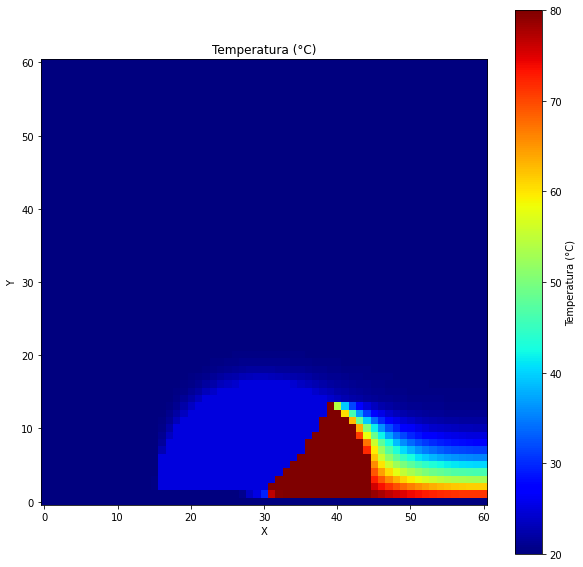

In [27]:
# plot da matriz de temperatura, invertendo o eixo y
plt.figure(figsize=(10, 10))
plt.imshow(Ts, cmap='jet', interpolation='nearest', origin='lower')
plt.colorbar(label='Temperatura (°C)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Temperatura (°C)')
plt.show()


$$
\left.\vec{Q}\right|_{\text {carro}}=-k \frac{\partial T}{\partial n} \vec{n}=-(k \nabla T \cdot \vec{n}) \vec{n} \text {; }
$$

$$
-k \nabla T=-k\left(\frac{\partial T}{\partial x} \hat{i}+\frac{\partial T}{\partial y} \hat{j}+\frac{\partial T}{\partial z} \hat{k}\right)
$$

In [28]:
# Funçao que calcula o fluxo de calor para cada ponto da matriz de temperatura
# baseado na equação Q = −(𝑘𝛻𝑇 ⋅ 𝑛)𝑛 
def fluxo_calor(matriz, matriz_temperatura, delta_x, k):
    matriz_fluxo_calor = deepcopy(matriz)
    for j in range(len(matriz_temperatura)):
        for i in range(len(matriz_temperatura[0])):
            if dentro_veiculo(i,j):
                matriz_fluxo_calor[j][i] = (0,0)
            elif i == 0:
                if v[j][i] >= 0:
                    matriz_fluxo_calor[j][i] = (-k * (matriz_temperatura[j][i+1]-matriz_temperatura[j][i]) / delta_x, -k * (matriz_temperatura[j][i]-matriz_temperatura[j-1][i]) / delta_x)
                else:
                    matriz_fluxo_calor[j][i] = (-k * (matriz_temperatura[j][i+1]-matriz_temperatura[j][i]) / delta_x, -k * (matriz_temperatura[j+1][i]-matriz_temperatura[j][i]) / delta_x)
            elif j == 0:
                if u[j][i] >= 0:
                    matriz_fluxo_calor[j][i] = (-k * (matriz_temperatura[j][i]-matriz_temperatura[j][i-1]) / delta_x, 0)
                else:
                    matriz_fluxo_calor[j][i] = (-k * (matriz_temperatura[j][i+1]-matriz_temperatura[j][i]) / delta_x, 0)
            elif i == len(matriz_temperatura[0])-1:
                if v[j][i] >= 0:
                    matriz_fluxo_calor[j][i] = (0, -k * (matriz_temperatura[j][i]-matriz_temperatura[j-1][i]) / delta_x)
                else:
                    matriz_fluxo_calor[j][i] = (0, -k * (matriz_temperatura[j+1][i]-matriz_temperatura[j][i]) / delta_x)
            elif j == len(matriz_temperatura)-1:
                if u[j][i] >= 0:
                    matriz_fluxo_calor[j][i] = (-k * (matriz_temperatura[j][i]-matriz_temperatura[j][i-1]) / delta_x, 0)
                else:
                    matriz_fluxo_calor[j][i] = (-k * (matriz_temperatura[j][i+1]-matriz_temperatura[j][i]) / delta_x, 0)                    
            elif u[j][i] >= 0 and v[j][i] >= 0:
                matriz_fluxo_calor[j][i] = (-k * (matriz_temperatura[j][i]-matriz_temperatura[j][i-1]) / delta_x, -k * (matriz_temperatura[j][i]-matriz_temperatura[j-1][i]) / delta_x)
            elif u[j][i] < 0 and v[j][i] >= 0:
                matriz_fluxo_calor[j][i] = (-k * (matriz_temperatura[j][i+1]-matriz_temperatura[j][i]) / delta_x, -k * (matriz_temperatura[j][i]-matriz_temperatura[j-1][i]) / delta_x)
            elif u[j][i] >= 0 and v[j][i] < 0:
                matriz_fluxo_calor[j][i] = (-k * (matriz_temperatura[j][i]-matriz_temperatura[j][i-1]) / delta_x, -k * (matriz_temperatura[j+1][i]-matriz_temperatura[j][i]) / delta_x)
            elif u[j][i] < 0 and v[j][i] < 0:
                matriz_fluxo_calor[j][i] = (-k * (matriz_temperatura[j][i+1]-matriz_temperatura[j][i]) / delta_x, -k * (matriz_temperatura[j+1][i]-matriz_temperatura[j][i]) / delta_x)
    return matriz_fluxo_calor

# define fluxo de calor
# Q é uma matriz de vetores, onde cada vetor representa o fluxo de calor em um ponto da malha
# o primeiro elemento do vetor é o fluxo de calor na direção x e o segundo na direção y
Q = fluxo_calor(malha, Ts, delta_x, k)

# cria matriz de fluxo de calor na direção x
Qx = deepcopy(Q)
for j in range(len(Q)):
    for i in range(len(Q[0])):
        Qx[j][i] = Q[j][i][0]
Qx = np.array(Qx)
        
# cria matriz de fluxo de calor na direção y
Qy = deepcopy(Q)
for j in range(len(Q)):
    for i in range(len(Q[0])):
        Qy[j][i] = Q[j][i][1]
Qy = np.array(Qy)


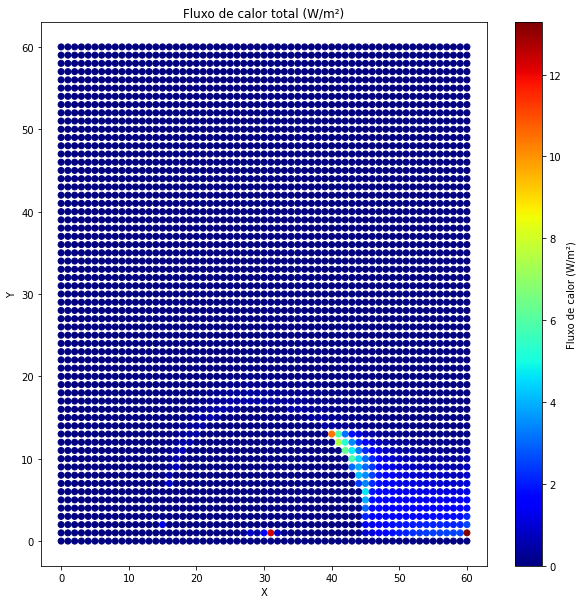

In [29]:
# scatter plot do fluxo de calor total Q
X, Y = np.meshgrid(np.arange(0, len(Qx[0])), np.arange(0, len(Qx)))
plt.figure(figsize=(10, 10))
plt.scatter(X, Y, c=np.sqrt(Qx**2 + Qy**2), cmap='jet')
plt.colorbar(label='Fluxo de calor (W/m²)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fluxo de calor total (W/m²)')
plt.show()


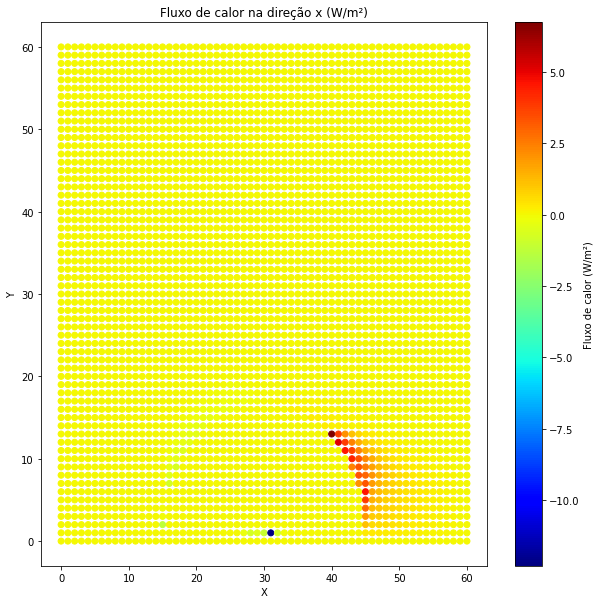

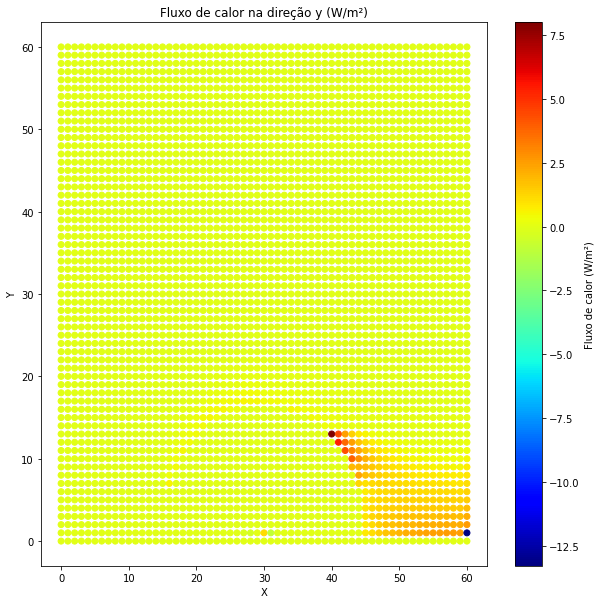

In [30]:
# plot do fluxo de calor na direção x
X, Y = np.meshgrid(np.arange(0, len(Qx[0])), np.arange(0, len(Qx)))
plt.figure(figsize=(10, 10))
plt.scatter(X, Y, c=Qx, cmap='jet')
plt.colorbar(label='Fluxo de calor (W/m²)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fluxo de calor na direção x (W/m²)')
plt.show()

# plot do fluxo de calor na direção y
X, Y = np.meshgrid(np.arange(0, len(Qy[0])), np.arange(0, len(Qy)))
plt.figure(figsize=(10, 10))
plt.scatter(X, Y, c=Qy, cmap='jet')
plt.colorbar(label='Fluxo de calor (W/m²)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fluxo de calor na direção y (W/m²)')
plt.show()


$$q=\int_A \vec{Q} \cdot \vec{n} d A=-\int_A k \frac{\partial T}{\partial n} d A=-\int_A k \nabla T \cdot \vec{n} d A$$

In [31]:
# define função para calcular a quantidade de calor total (unidade W) trocada pela área A do veículo com o ar
# baseado na equação: $$q=\int_A \vec{Q} \cdot \vec{n} d A=-\int_A k \frac{\partial T}{\partial n} d A=-\int_A k \nabla T \cdot \vec{n} d A$$
def quantidade_calor(Q, A):
    q = 0
    for j in range(len(Q)):
        for i in range(len(Q[0])):
            if i == 0:
                q += Q[j][i][0] * A
            elif i == len(Q[0])-1:
                q += -Q[j][i][0] * A
            elif j == 0:
                q += Q[j][i][1] * A
            elif j == len(Q)-1:
                q += -Q[j][i][1] * A
            else:
                q += Q[j][i][0] * A + Q[j][i][1] * A
    return q

q = quantidade_calor(Q, A)

print('Quantidade de calor total trocada com o ar: {:.2f} W'.format(q))


Quantidade de calor total trocada com o ar: 25.07 W


## Parte III

### a) h={0.10, 0.05, 0.20, 0.025} m

In [32]:
lista_lift = []

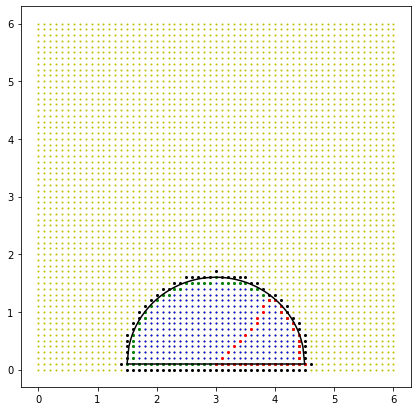

In [33]:
h=0.10

malha=criar_matriz_malha(delta_x)
pontos_ao_redor=encontrar_pontos_fora(malha)
pontos_interior=encontrar_pontos_interior(malha)
pontos_im_dentro=encontrar_pontos_im_dentro(malha)
pontos_dentro_motor = encontrar_pontos_dentro_motor(malha)

plotar_matriz(
    matriz_malha=malha,
    pontos_interior=pontos_interior,
    pontos_im_dentro=pontos_im_dentro,
    pontos_ao_redor=pontos_ao_redor,
    pontos_dentro_motor=pontos_dentro_motor
)

psis = liebmann(criar_matriz_zeros(criar_matriz_malha(delta_x)), tol, delta_x)
psis = np.array(psis)
# derivadas de psi em x e y
u = derivada_y(psis, delta_x)
v = -derivada_x(psis, delta_x)
# calcula a pressao
pressao = calc_pressao(psis, u, v, delta_x)
# calcula a forca de lift total sobre o veiculo
forca_lift_total = calc_forca_lift_total()
lista_lift.append(forca_lift_total)

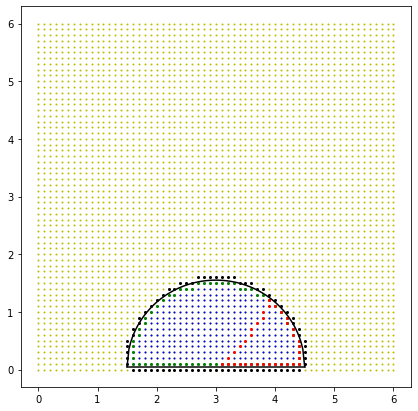

In [34]:
h=0.05

malha=criar_matriz_malha(delta_x)
pontos_ao_redor=encontrar_pontos_fora(malha)
pontos_interior=encontrar_pontos_interior(malha)
pontos_im_dentro=encontrar_pontos_im_dentro(malha)
pontos_dentro_motor = encontrar_pontos_dentro_motor(malha)

plotar_matriz(
    matriz_malha=malha,
    pontos_interior=pontos_interior,
    pontos_im_dentro=pontos_im_dentro,
    pontos_ao_redor=pontos_ao_redor,
    pontos_dentro_motor=pontos_dentro_motor
)

psis = liebmann(criar_matriz_zeros(criar_matriz_malha(delta_x)), tol, delta_x)
psis = np.array(psis)
# derivadas de psi em x e y
u = derivada_y(psis, delta_x)
v = -derivada_x(psis, delta_x)
# calcula a pressao
pressao = calc_pressao(psis, u, v, delta_x)
# calcula a forca de lift total sobre o veiculo
forca_lift_total = calc_forca_lift_total()
lista_lift.append(forca_lift_total)

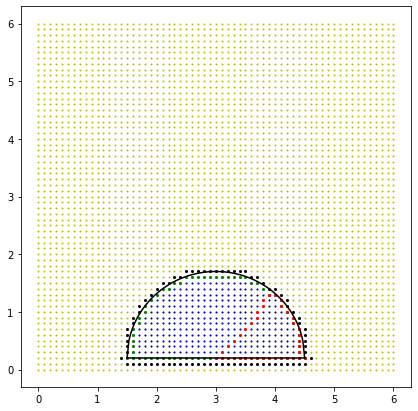

In [35]:
h=0.20

malha=criar_matriz_malha(delta_x)
pontos_ao_redor=encontrar_pontos_fora(malha)
pontos_interior=encontrar_pontos_interior(malha)
pontos_im_dentro=encontrar_pontos_im_dentro(malha)
pontos_dentro_motor = encontrar_pontos_dentro_motor(malha)

plotar_matriz(
    matriz_malha=malha,
    pontos_interior=pontos_interior,
    pontos_im_dentro=pontos_im_dentro,
    pontos_ao_redor=pontos_ao_redor,
    pontos_dentro_motor=pontos_dentro_motor
)

psis = liebmann(criar_matriz_zeros(criar_matriz_malha(delta_x)), tol, delta_x)
psis = np.array(psis)
# derivadas de psi em x e y
u = derivada_y(psis, delta_x)
v = -derivada_x(psis, delta_x)
# calcula a pressao
pressao = calc_pressao(psis, u, v, delta_x)
# calcula a forca de lift total sobre o veiculo
forca_lift_total = calc_forca_lift_total()
lista_lift.append(forca_lift_total)

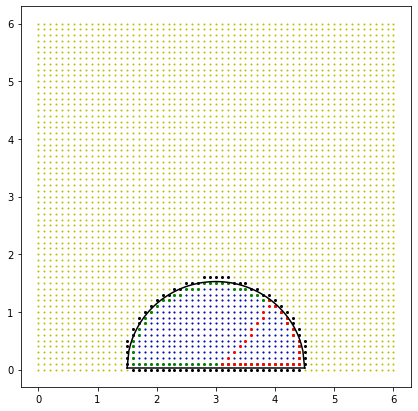

In [36]:
h=0.025

malha=criar_matriz_malha(delta_x)
pontos_ao_redor=encontrar_pontos_fora(malha)
pontos_interior=encontrar_pontos_interior(malha)
pontos_im_dentro=encontrar_pontos_im_dentro(malha)
pontos_dentro_motor = encontrar_pontos_dentro_motor(malha)

plotar_matriz(
    matriz_malha=malha,
    pontos_interior=pontos_interior,
    pontos_im_dentro=pontos_im_dentro,
    pontos_ao_redor=pontos_ao_redor,
    pontos_dentro_motor=pontos_dentro_motor
)

psis = liebmann(criar_matriz_zeros(criar_matriz_malha(delta_x)), tol, delta_x)
psis = np.array(psis)
# derivadas de psi em x e y
u = derivada_y(psis, delta_x)
v = -derivada_x(psis, delta_x)
# calcula a pressao
pressao = calc_pressao(psis, u, v, delta_x)
# calcula a forca de lift total sobre o veiculo
forca_lift_total = calc_forca_lift_total()
lista_lift.append(forca_lift_total)

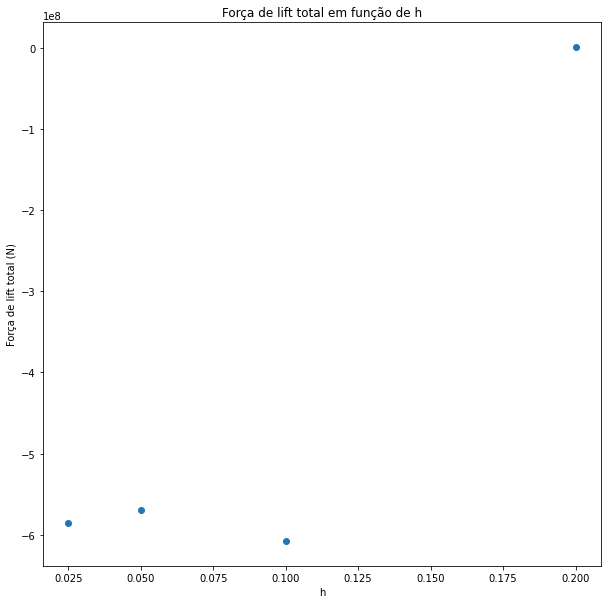

In [37]:
# plota lista de forcas de lift em funcao de h
plt.figure(figsize=(10, 10))
plt.scatter([0.10, 0.05, 0.20, 0.025], lista_lift)
plt.xlabel('h')
plt.ylabel('Força de lift total (N)')
plt.title('Força de lift total em função de h')
plt.show()


### b) V={75, 140} km/h

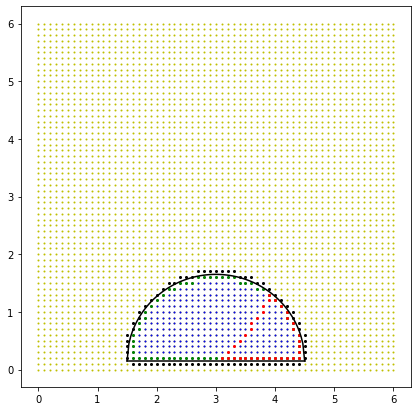

In [38]:
h=0.15
lista_lift = []

malha=criar_matriz_malha(delta_x)
pontos_ao_redor=encontrar_pontos_fora(malha)
pontos_interior=encontrar_pontos_interior(malha)
pontos_im_dentro=encontrar_pontos_im_dentro(malha)
pontos_dentro_motor = encontrar_pontos_dentro_motor(malha)

plotar_matriz(
    matriz_malha=malha,
    pontos_interior=pontos_interior,
    pontos_im_dentro=pontos_im_dentro,
    pontos_ao_redor=pontos_ao_redor,
    pontos_dentro_motor=pontos_dentro_motor
)

In [39]:
V=75/3.6
psis = liebmann(criar_matriz_zeros(criar_matriz_malha(delta_x)), tol, delta_x)
psis = np.array(psis)
# derivadas de psi em x e y
u = derivada_y(psis, delta_x)
v = -derivada_x(psis, delta_x)
# calcula a pressao
pressao = calc_pressao(psis, u, v, delta_x)
# calcula a forca de lift total sobre o veiculo
forca_lift_total = calc_forca_lift_total()
lista_lift.append(forca_lift_total)

In [40]:
V=140/3.6
psis = liebmann(criar_matriz_zeros(criar_matriz_malha(delta_x)), tol, delta_x)
psis = np.array(psis)
# derivadas de psi em x e y
u = derivada_y(psis, delta_x)
v = -derivada_x(psis, delta_x)
# calcula a pressao
pressao = calc_pressao(psis, u, v, delta_x)
# calcula a forca de lift total sobre o veiculo
forca_lift_total = calc_forca_lift_total()
lista_lift.append(forca_lift_total)

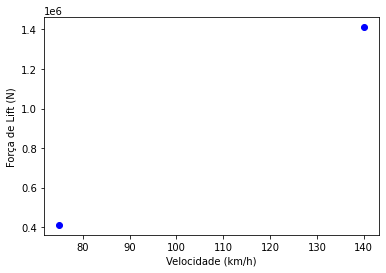

In [41]:
# plota lista de forcas de lift em funcao da velocidade
plt.plot([75, 140], lista_lift, "bo")
plt.xlabel("Velocidade (km/h)")
plt.ylabel("Força de Lift (N)")
plt.show()